In [1]:
import numpy as np
import pandas as pd
import json
import spacy
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

Load utterance-based reference chains.

In [2]:
with open('../data/chains-v2/train.json', 'r') as f:
    train_set = json.load(f)
    
with open('../data/chains-v2/val.json', 'r') as f:
    val_set = json.load(f)
    
with open('../data/chains-v2/test.json', 'r') as f:
    test_set = json.load(f)

Make sure all 30 image domains are represented in all splits.

In [3]:
for _set in [train_set, val_set, test_set]: 
    domains = set()
    for img_path in _set.keys():
        domain, _ = img_path.split('/')
        domains.add(domain)
    assert len(domains) == 30

image_domains = list(domains)

## Collect overall statistics

In [4]:
# Use same tokeniser deployed for dataset creation.
spacy_tokenizer = spacy.load('en_core_web_sm')

Split **training chains** by image domain.

In [5]:
n_utt_bydomain = defaultdict(int)
chain_lens_bydomain = defaultdict(list)
utt_lens_bydomain = defaultdict(list)
for img_path in train_set:
    domain, _ = img_path.split('/')
    
    for game_id in train_set[img_path]:        
        chain = train_set[img_path][game_id]
        chain_lens_bydomain[domain].append(len(chain))
        
        for utt in train_set[img_path][game_id]:
            n_utt_bydomain[domain] += 1
            utt_lens_bydomain[domain].append(len([tok for tok in spacy_tokenizer(utt['Message_Text'])]))

Create dataframe with training set statistics.

In [6]:
df_train = pd.DataFrame(
    data={'domain': image_domains,
          'num utterances': [n_utt_bydomain[d] for d in image_domains],
          'num chains': [len(chain_lens_bydomain[d]) for d in image_domains],
          'num tokens': [sum(utt_lens_bydomain[d]) for d in image_domains],
          'avg utterance length': [np.mean(utt_lens_bydomain[d]) for d in image_domains],
          'stdev utterance length': [np.std(utt_lens_bydomain[d]) for d in image_domains],
          'median utterance length': [np.median(utt_lens_bydomain[d]) for d in image_domains],
          'avg chain length': [np.mean(chain_lens_bydomain[d]) for d in image_domains],
          'stdev chain length': [np.std(chain_lens_bydomain[d]) for d in image_domains],
          'median chain length': [np.median(chain_lens_bydomain[d]) for d in image_domains]
         })

Split **validation chains** by image domain.

In [7]:
n_utt_bydomain = defaultdict(int)
chain_lens_bydomain = defaultdict(list)
utt_lens_bydomain = defaultdict(list)
for img_path in val_set:
    domain, _ = img_path.split('/')
    
    for game_id in val_set[img_path]:        
        chain = val_set[img_path][game_id]
        chain_lens_bydomain[domain].append(len(chain))
        
        for utt in val_set[img_path][game_id]:
            n_utt_bydomain[domain] += 1
            utt_lens_bydomain[domain].append(len([tok for tok in spacy_tokenizer(utt['Message_Text'])]))

Create dataframe with validation set statistics.

In [8]:
df_val = pd.DataFrame(
    data={'domain': image_domains,
          'num utterances': [n_utt_bydomain[d] for d in image_domains],
          'num chains': [len(chain_lens_bydomain[d]) for d in image_domains],
          'num tokens': [sum(utt_lens_bydomain[d]) for d in image_domains],
          'avg utterance length': [np.mean(utt_lens_bydomain[d]) for d in image_domains],
          'stdev utterance length': [np.std(utt_lens_bydomain[d]) for d in image_domains],
          'median utterance length': [np.median(utt_lens_bydomain[d]) for d in image_domains],
          'avg chain length': [np.mean(chain_lens_bydomain[d]) for d in image_domains],
          'stdev chain length': [np.std(chain_lens_bydomain[d]) for d in image_domains],
          'median chain length': [np.median(chain_lens_bydomain[d]) for d in image_domains]
         })

Split **test chains** by image domain.

In [9]:
n_utt_bydomain = defaultdict(int)
chain_lens_bydomain = defaultdict(list)
utt_lens_bydomain = defaultdict(list)
for img_path in test_set:
    domain, _ = img_path.split('/')
    
    for game_id in test_set[img_path]:        
        chain = test_set[img_path][game_id]
        chain_lens_bydomain[domain].append(len(chain))
        
        for utt in test_set[img_path][game_id]:
            n_utt_bydomain[domain] += 1
            utt_lens_bydomain[domain].append(len([tok for tok in spacy_tokenizer(utt['Message_Text'])]))

Create dataframe with test set statistics.

In [10]:
df_test = pd.DataFrame(
    data={'domain': image_domains,
          'num utterances': [n_utt_bydomain[d] for d in image_domains],
          'num chains': [len(chain_lens_bydomain[d]) for d in image_domains],
          'num tokens': [sum(utt_lens_bydomain[d]) for d in image_domains],
          'avg utterance length': [np.mean(utt_lens_bydomain[d]) for d in image_domains],
          'stdev utterance length': [np.std(utt_lens_bydomain[d]) for d in image_domains],
          'median utterance length': [np.median(utt_lens_bydomain[d]) for d in image_domains],
          'avg chain length': [np.mean(chain_lens_bydomain[d]) for d in image_domains],
          'stdev chain length': [np.std(chain_lens_bydomain[d]) for d in image_domains],
          'median chain length': [np.median(chain_lens_bydomain[d]) for d in image_domains]
         })

Join train, validation, and test dataframes.

In [11]:
df = pd.concat([df_train, df_val, df_test], keys=['train', 'val', 'test'])

----

In [52]:
df.mean()

num utterances              554.944444
num chains                  200.666667
num tokens                 5535.588889
avg utterance length          9.995679
stdev utterance length        4.969121
median utterance length       9.144444
avg chain length              2.764734
stdev chain length            1.037865
median chain length           3.000000
dtype: float64

In [53]:
df.std()

num utterances              458.921828
num chains                  165.966221
num tokens                 4586.554338
avg utterance length          0.754313
stdev utterance length        0.312457
median utterance length       0.954718
avg chain length              0.081080
stdev chain length            0.051911
median chain length           0.000000
dtype: float64

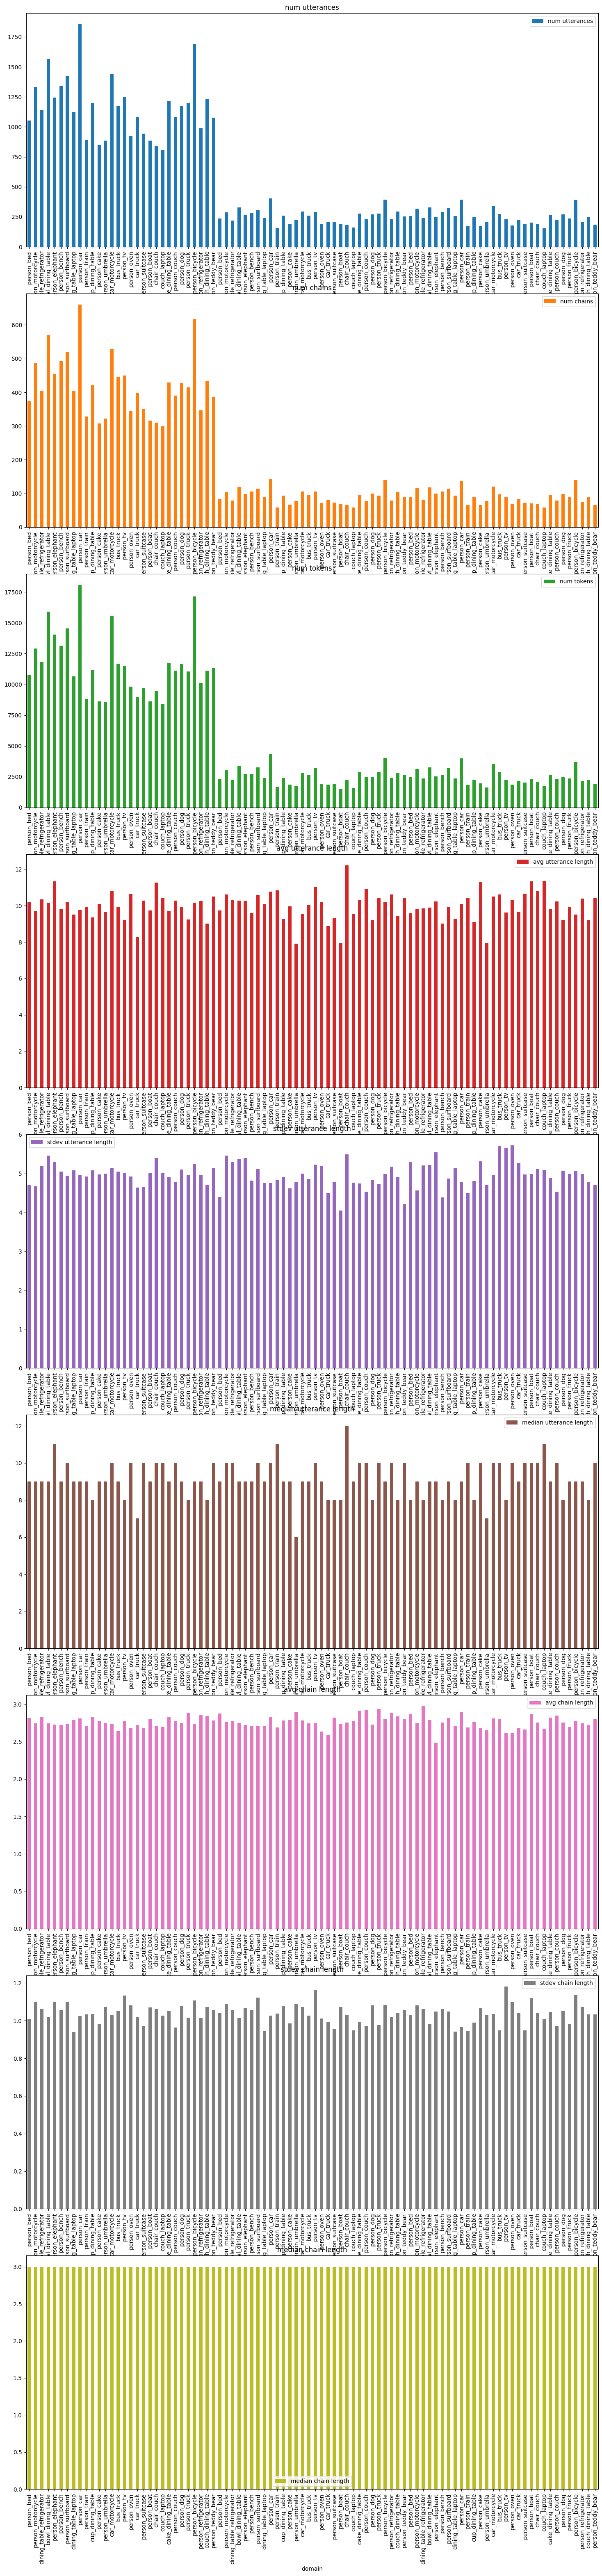

In [12]:
plt.rcParams['figure.figsize'] = [18, 80]
plt.rcParams['figure.dpi'] = 100
ax = df.plot(x='domain', kind='bar', subplots=True, sharex=False)

-----

## Vocabulary overlaps

In [13]:
train_vocabs = {d: Counter() for d in image_domains}
val_vocabs = {d: Counter() for d in image_domains}
test_vocabs = {d: Counter() for d in image_domains}

In [14]:
for img_path in train_set:
    domain, _ = img_path.split('/')  
    for game_id in train_set[img_path]:        
        for utt in train_set[img_path][game_id]:
            for token in [tok.text for tok in spacy_tokenizer(utt['Message_Text'])]:
                train_vocabs[domain][token.lower()] += 1
                
for img_path in val_set:
    domain, _ = img_path.split('/')  
    for game_id in val_set[img_path]:        
        for utt in val_set[img_path][game_id]:
            for token in [tok.text for tok in spacy_tokenizer(utt['Message_Text'])]:
                val_vocabs[domain][token.lower()] += 1
                
for img_path in test_set:
    domain, _ = img_path.split('/')  
    for game_id in test_set[img_path]:        
        for utt in test_set[img_path][game_id]:
            for token in [tok.text for tok in spacy_tokenizer(utt['Message_Text'])]:
                test_vocabs[domain][token.lower()] += 1

#### Training

In [15]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(train_vocabs[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(train_vocabs[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

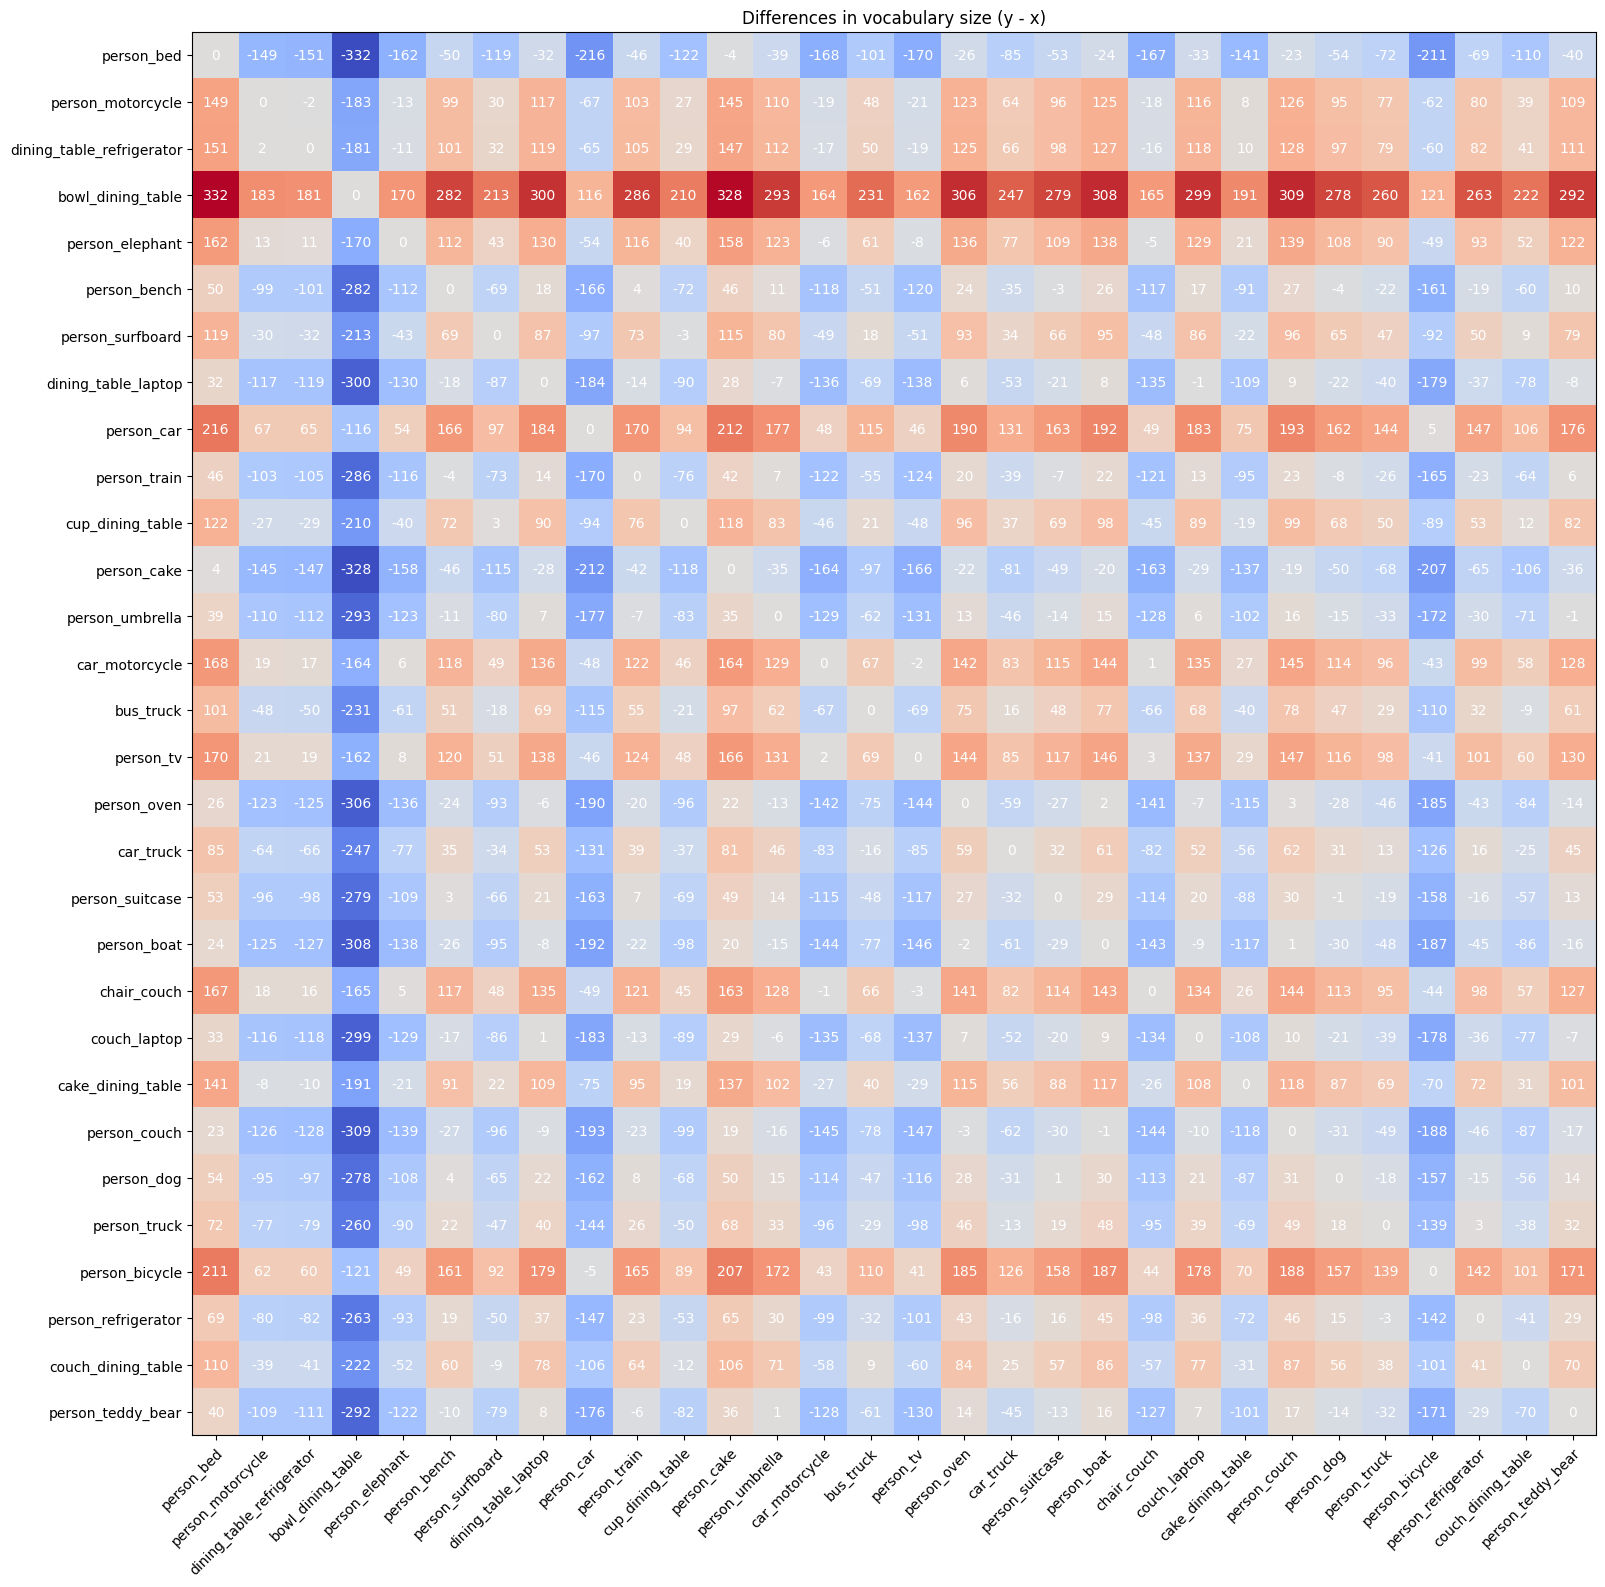

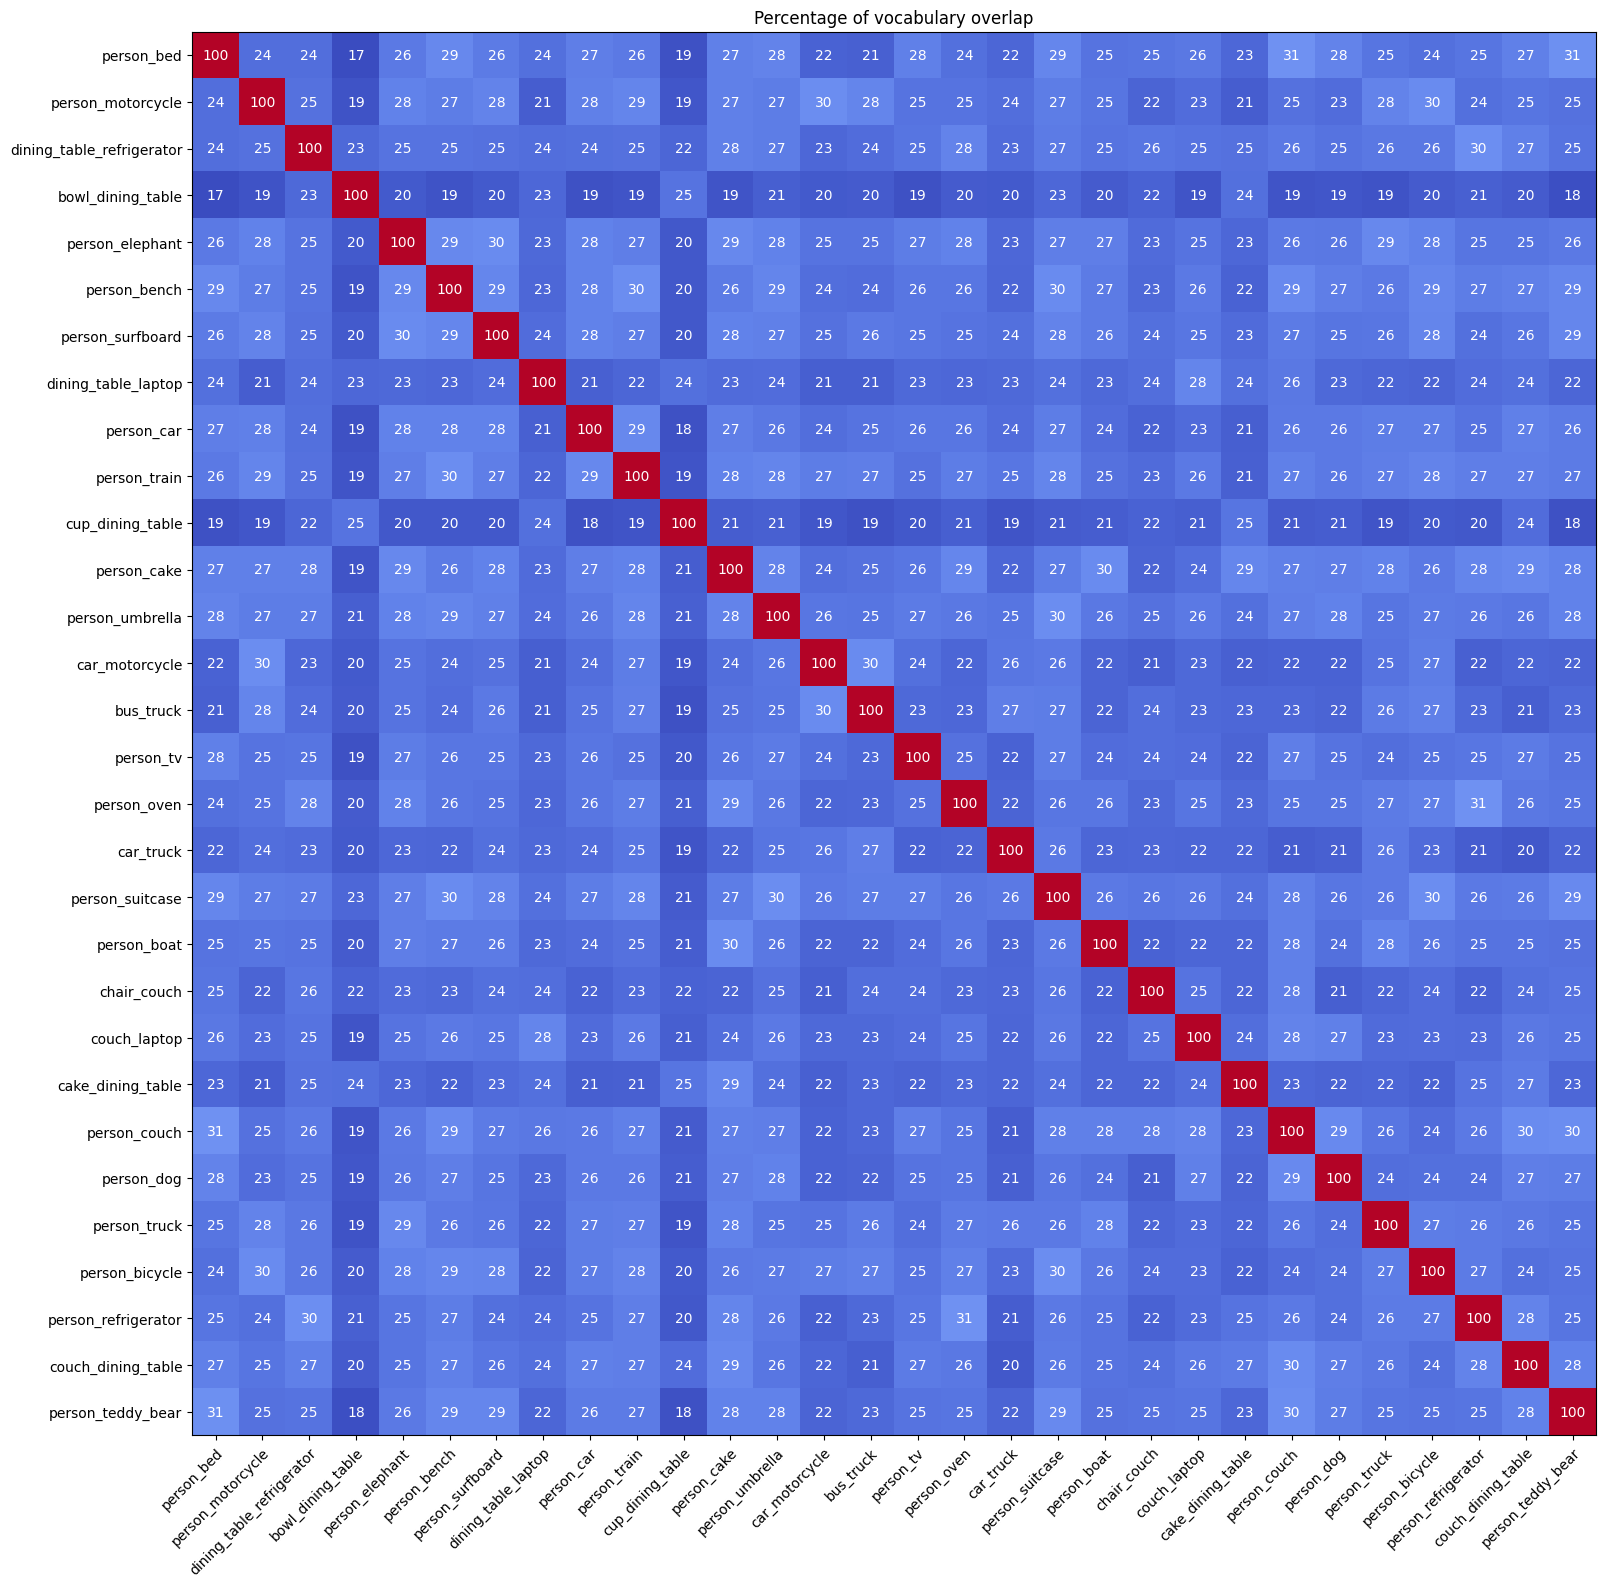

In [16]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

#### Validation

In [17]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(val_vocabs[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(val_vocabs[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

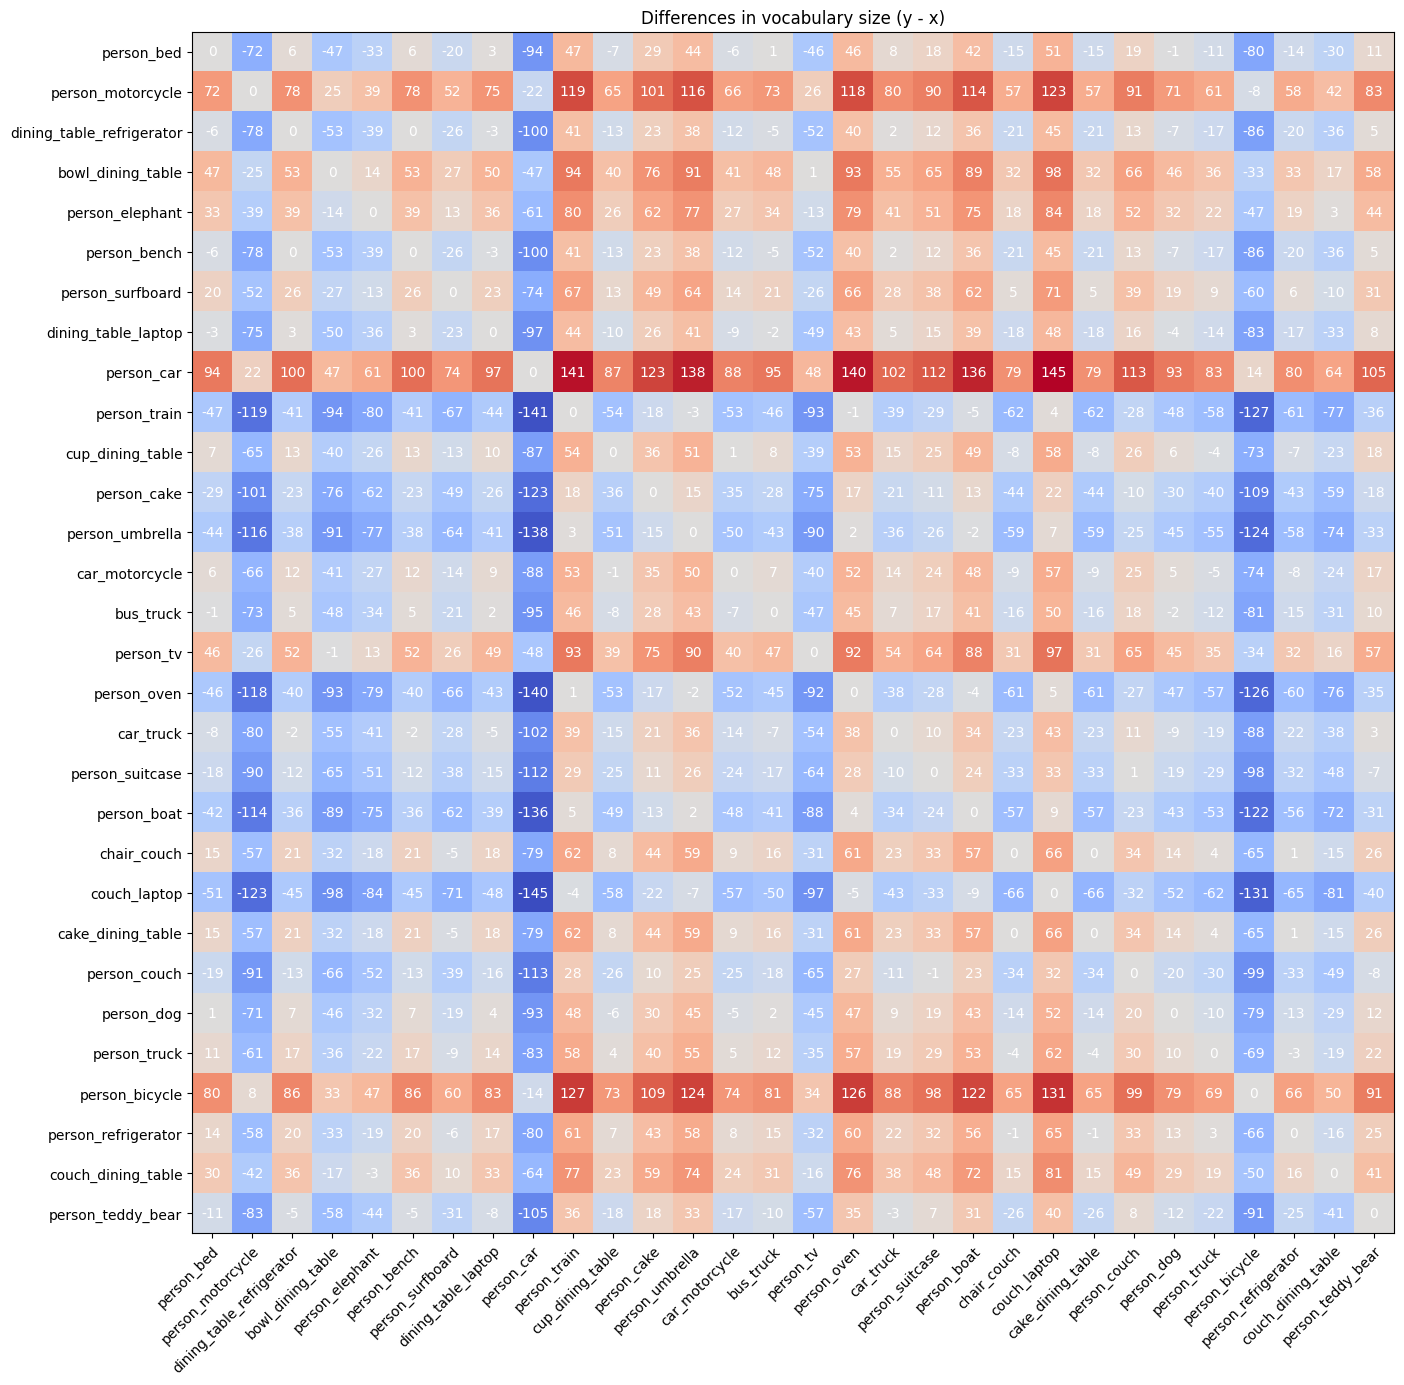

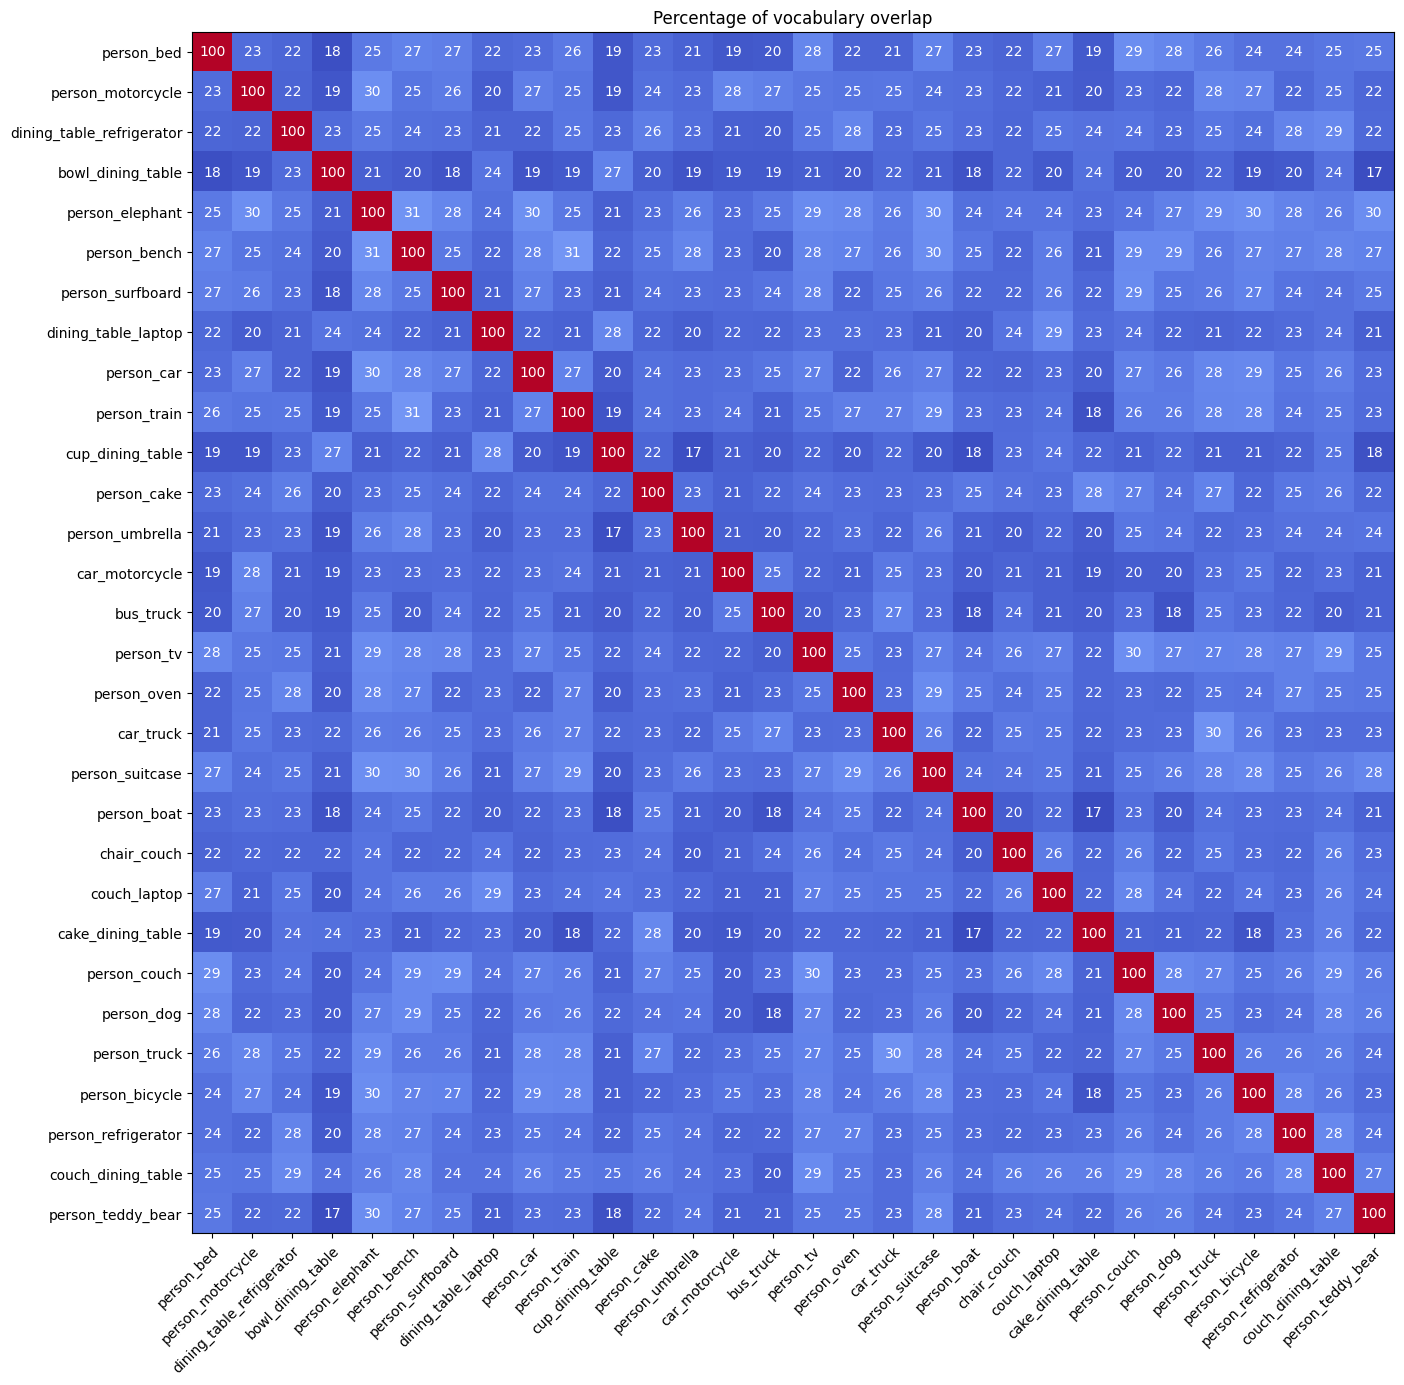

In [18]:
plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

#### Test

In [19]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(test_vocabs[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(test_vocabs[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

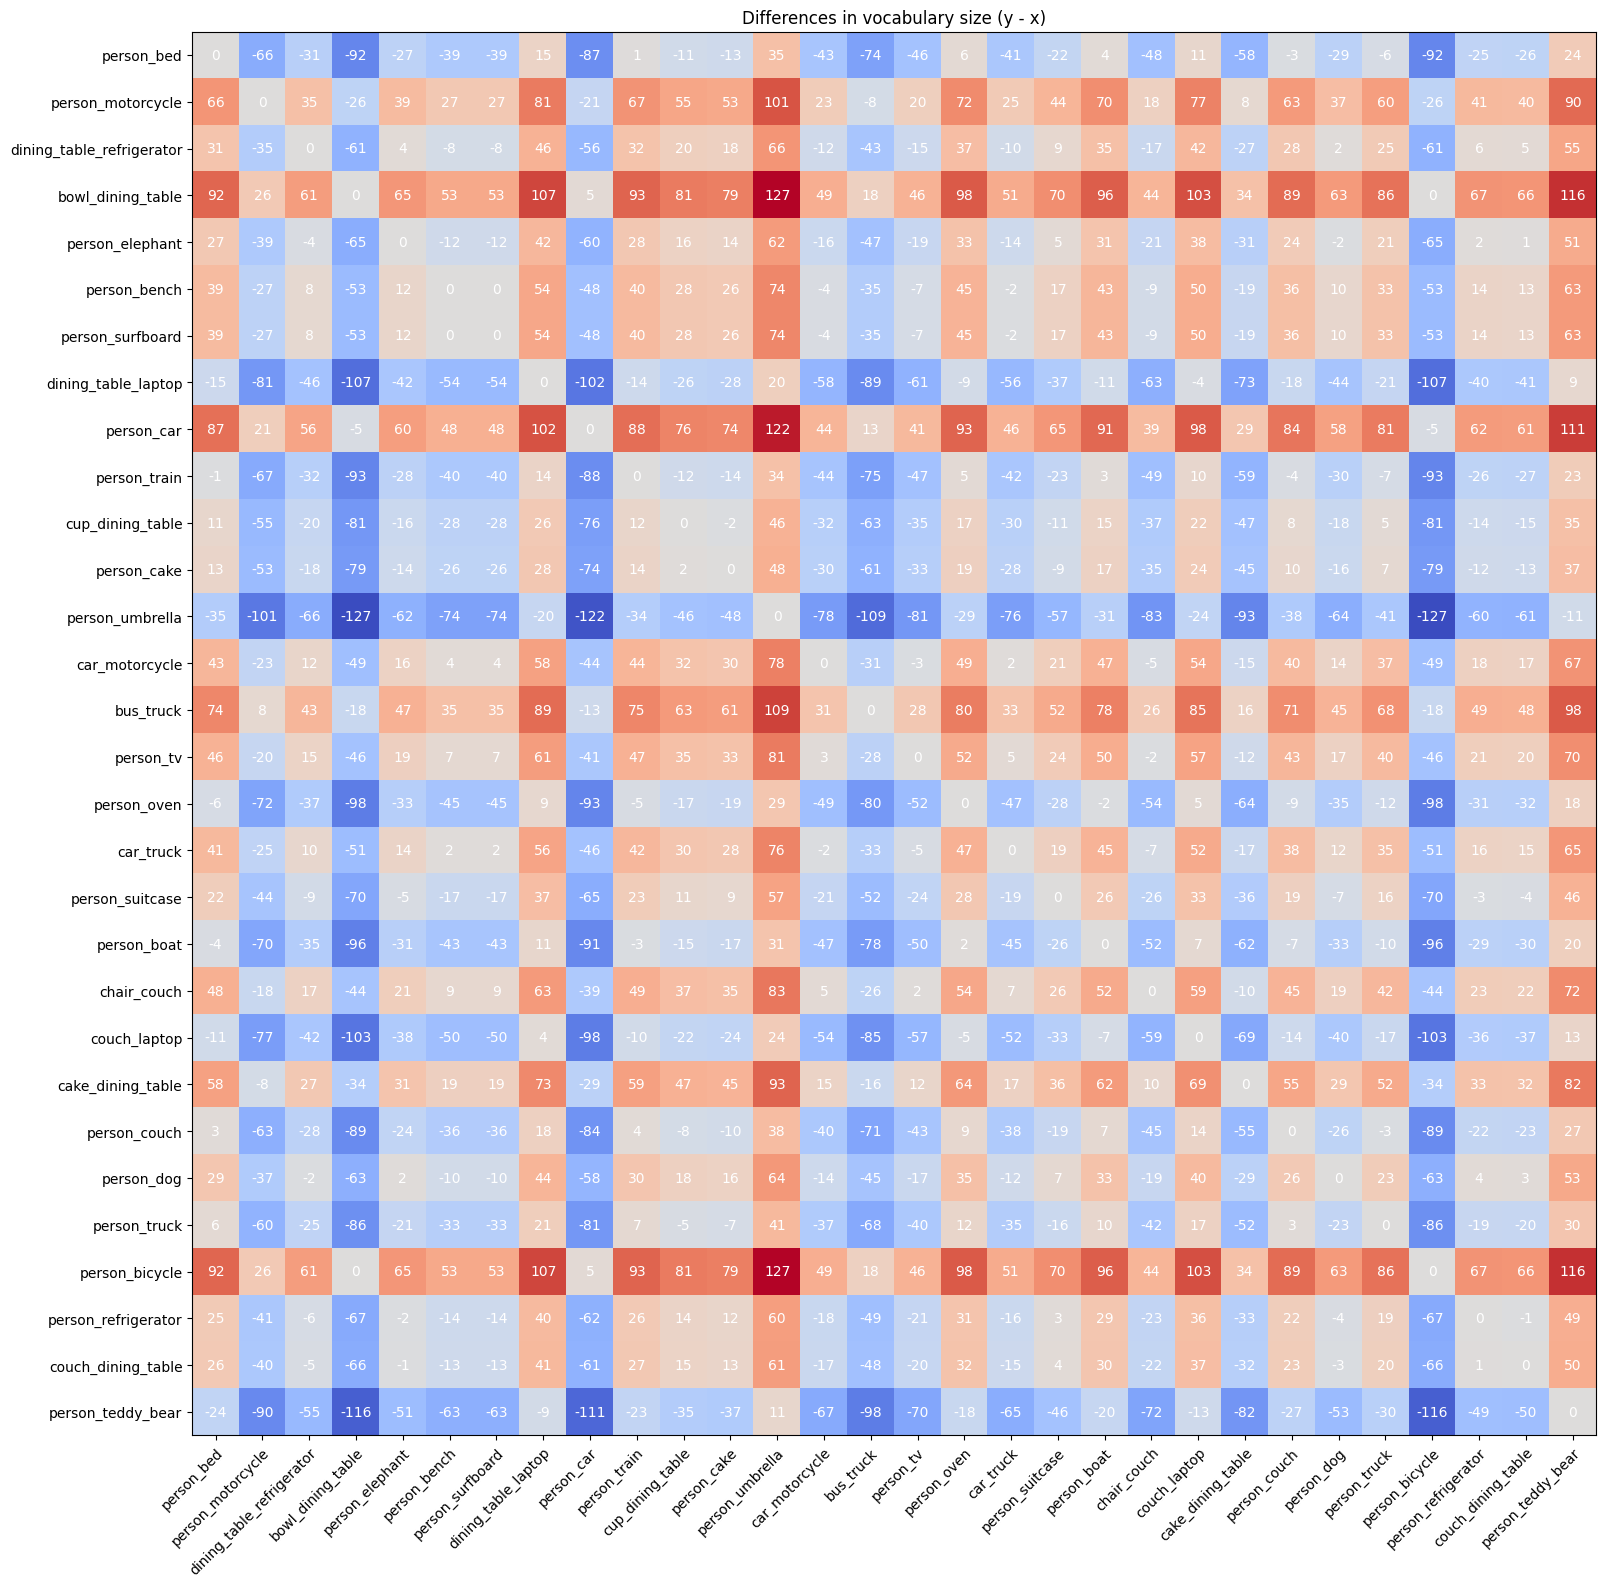

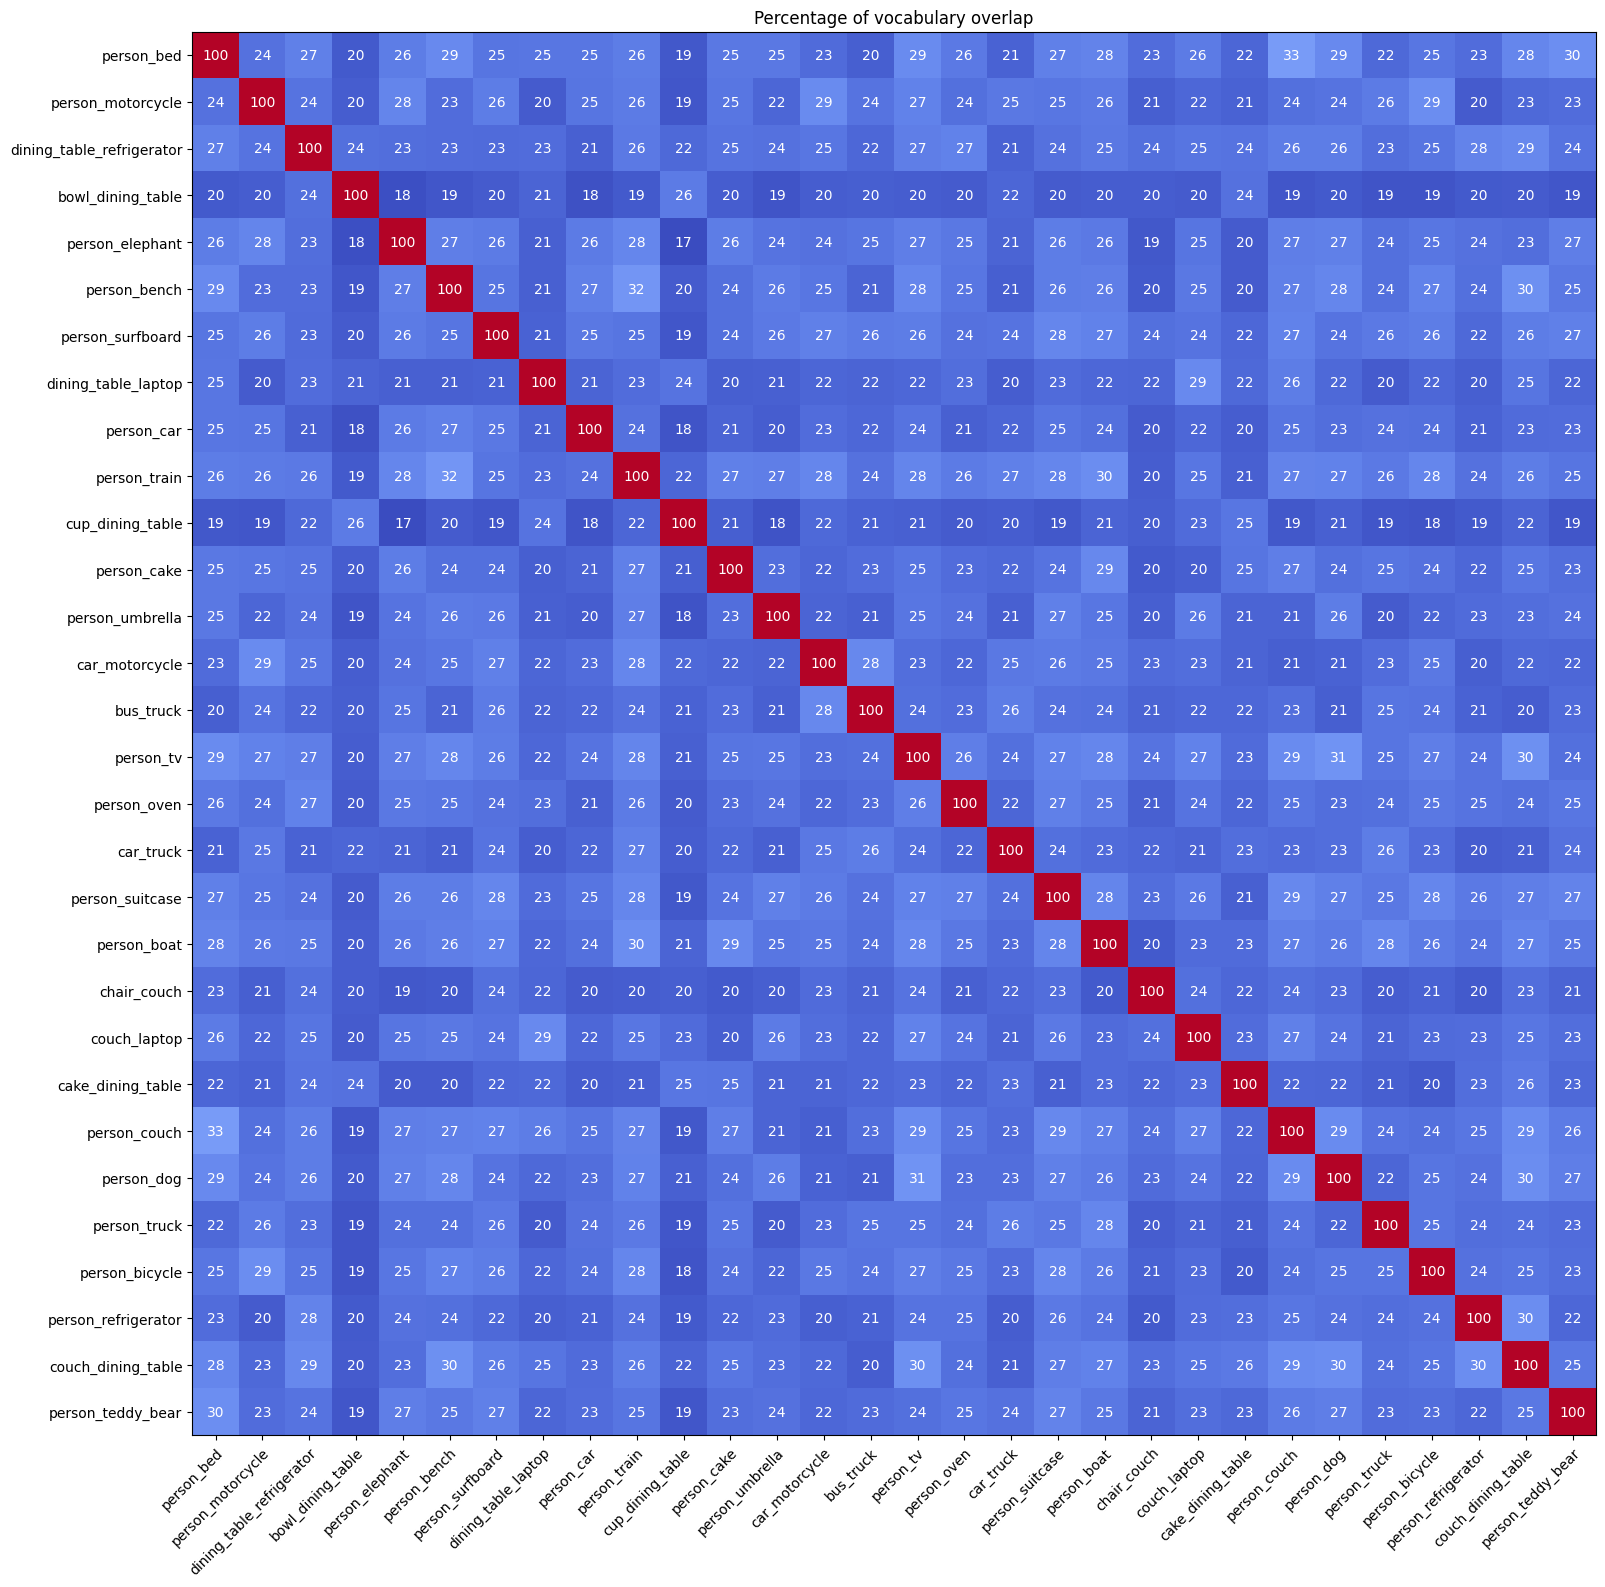

In [20]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

#### Now removing stopwords

In [21]:
stopwords_en = spacy.lang.en.stop_words.STOP_WORDS
stopwords_en |= {'no', 'noo', 'nope', 'yes', 'yeah', 'ok', 'oh', 'ha', '.', '!', '?', ',', '(', ')', '..', '...', 'i', 'I'}

stopword = lambda x: x in stopwords_en or x.isnumeric()

In [22]:
train_vocabs_nostopwords = {}
for d in image_domains:
    train_vocabs_nostopwords[d] = Counter({w: fr for w, fr in train_vocabs[d].items() if not stopword(w)})
                                                                   
val_vocabs_nostopwords = {}
for d in image_domains:
    val_vocabs_nostopwords[d] = Counter({w: fr for w, fr in val_vocabs[d].items() if not stopword(w)})
    
test_vocabs_nostopwords = {}
for d in image_domains:
    test_vocabs_nostopwords[d] = Counter({w: fr for w, fr in test_vocabs[d].items() if not stopword(w)})

#### Training

In [23]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(train_vocabs_nostopwords[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(train_vocabs_nostopwords[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

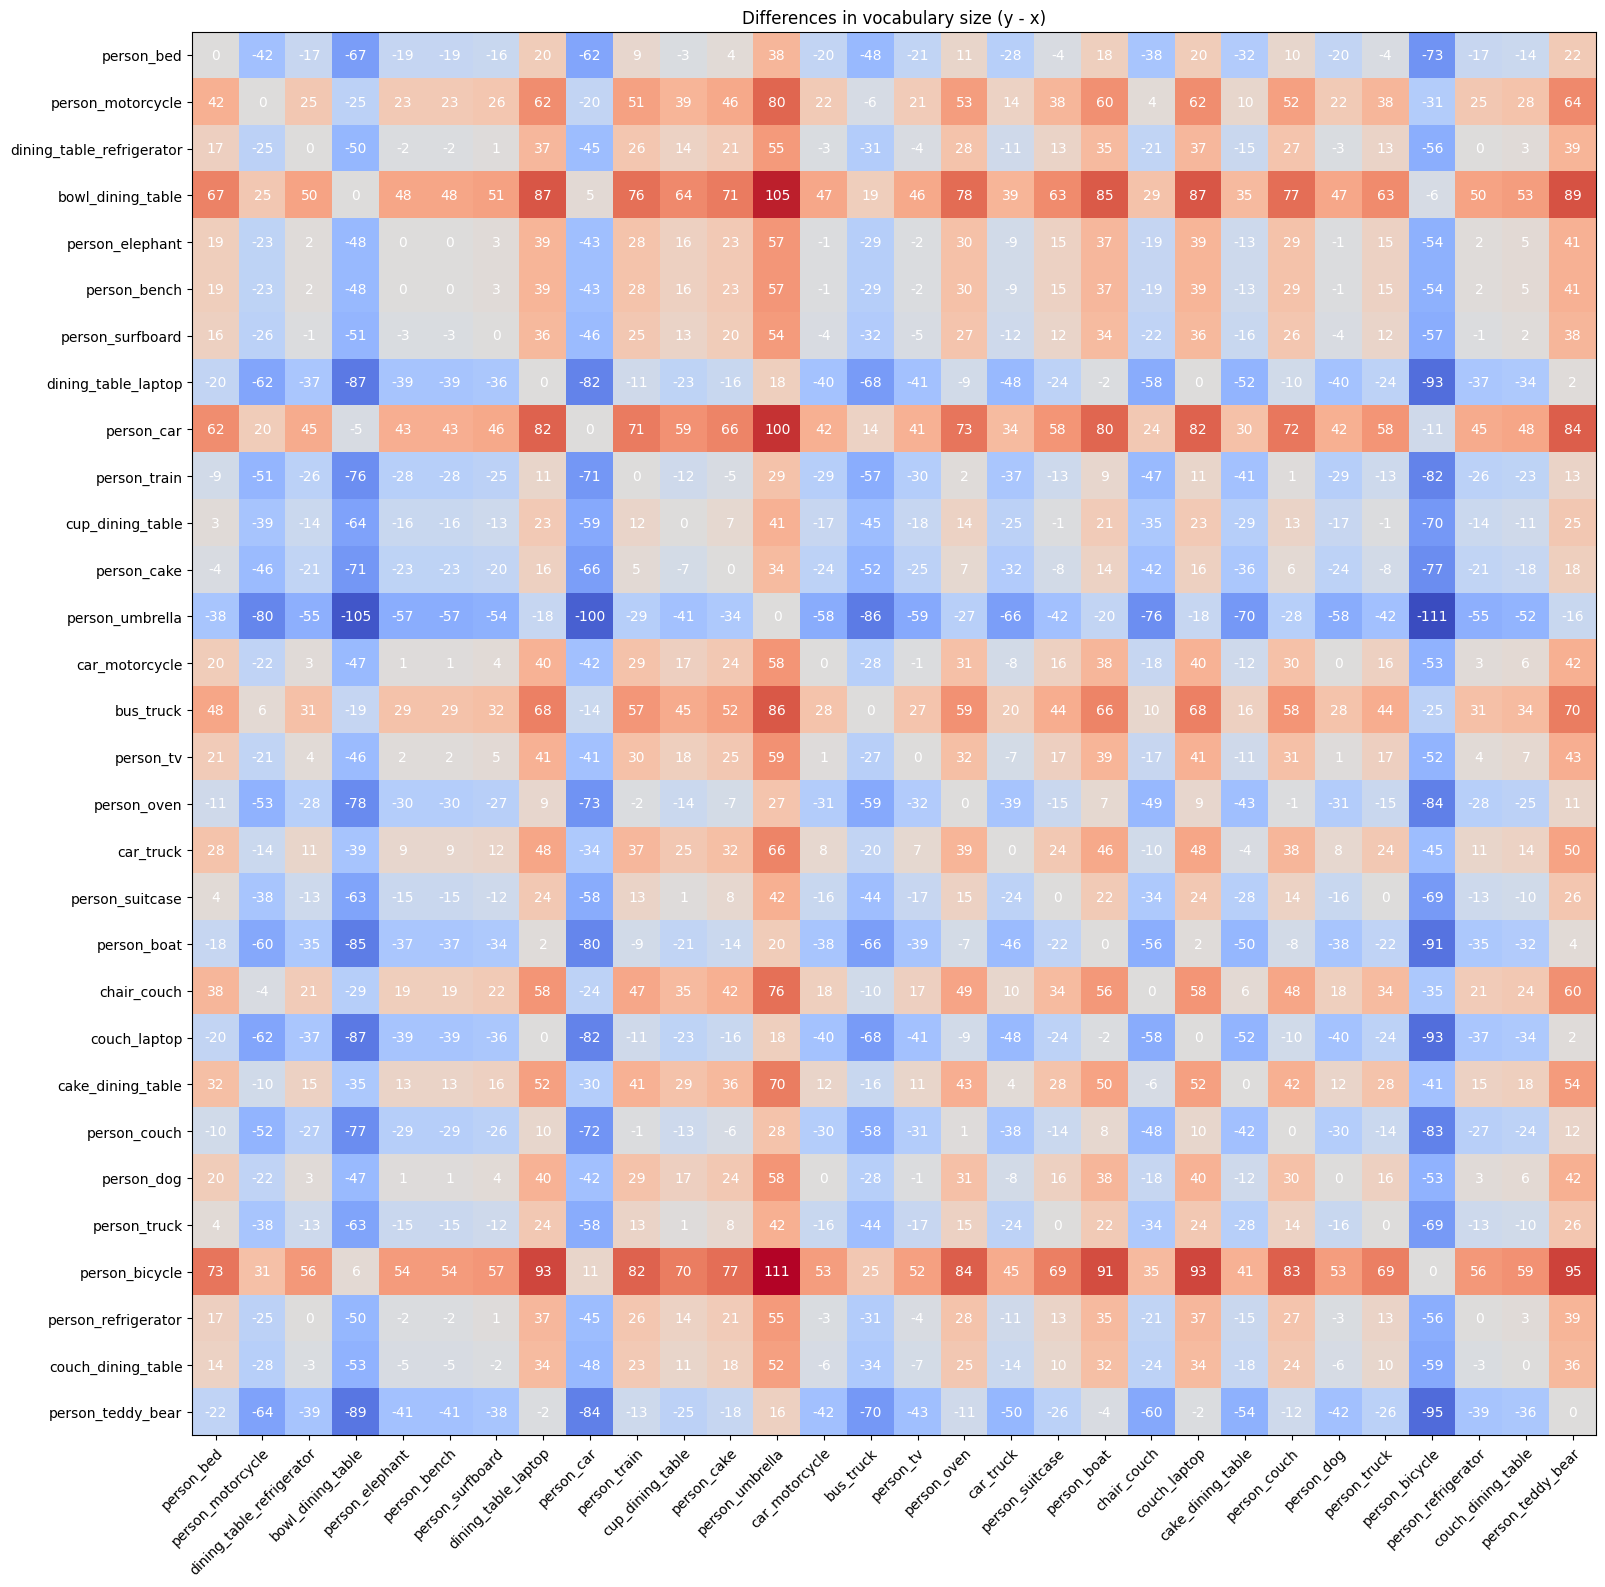

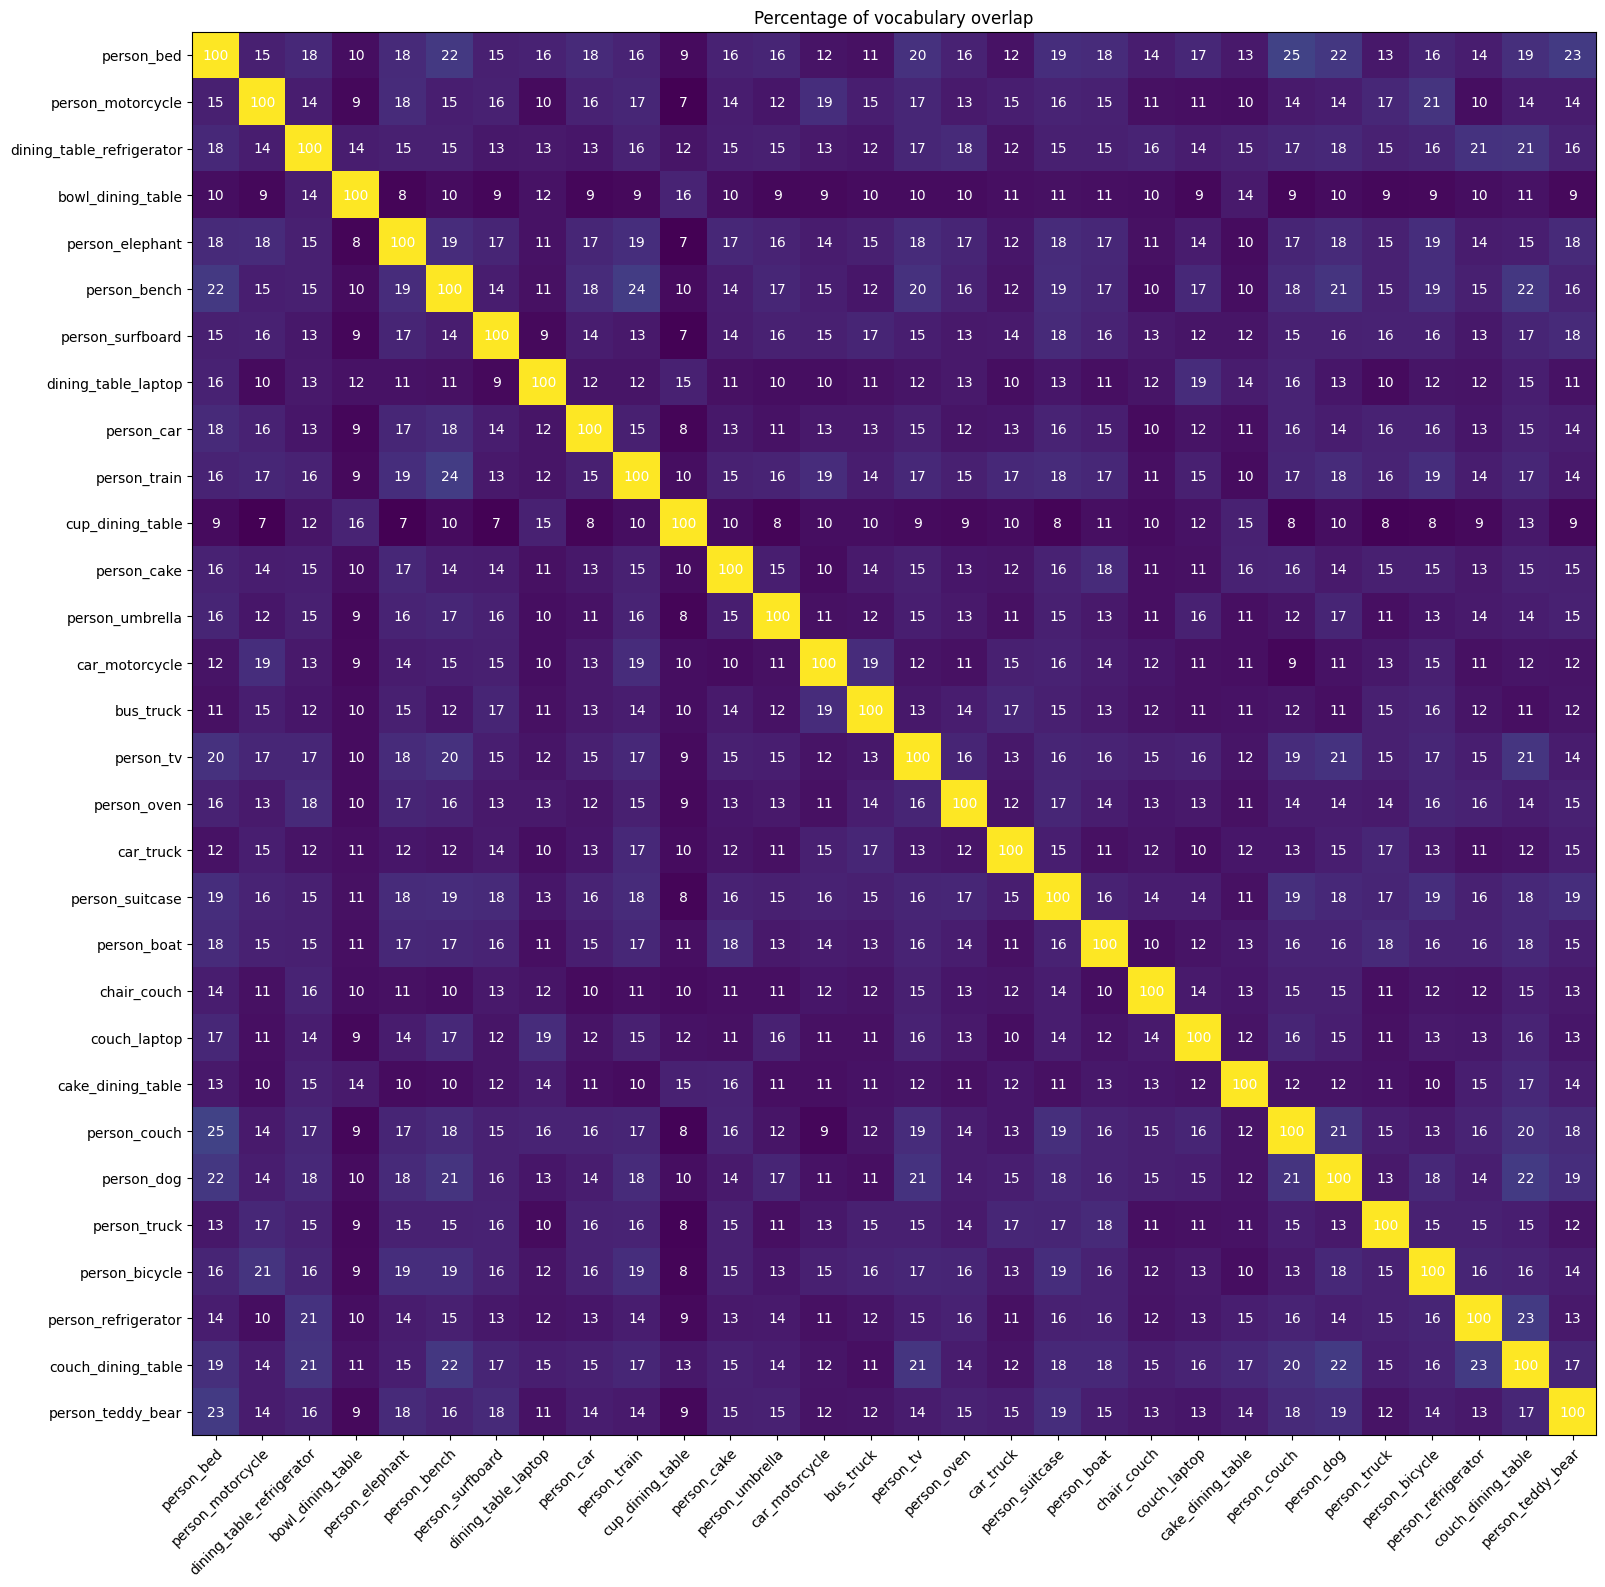

In [55]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap)

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

#### Validation

In [25]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(val_vocabs_nostopwords[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(val_vocabs_nostopwords[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

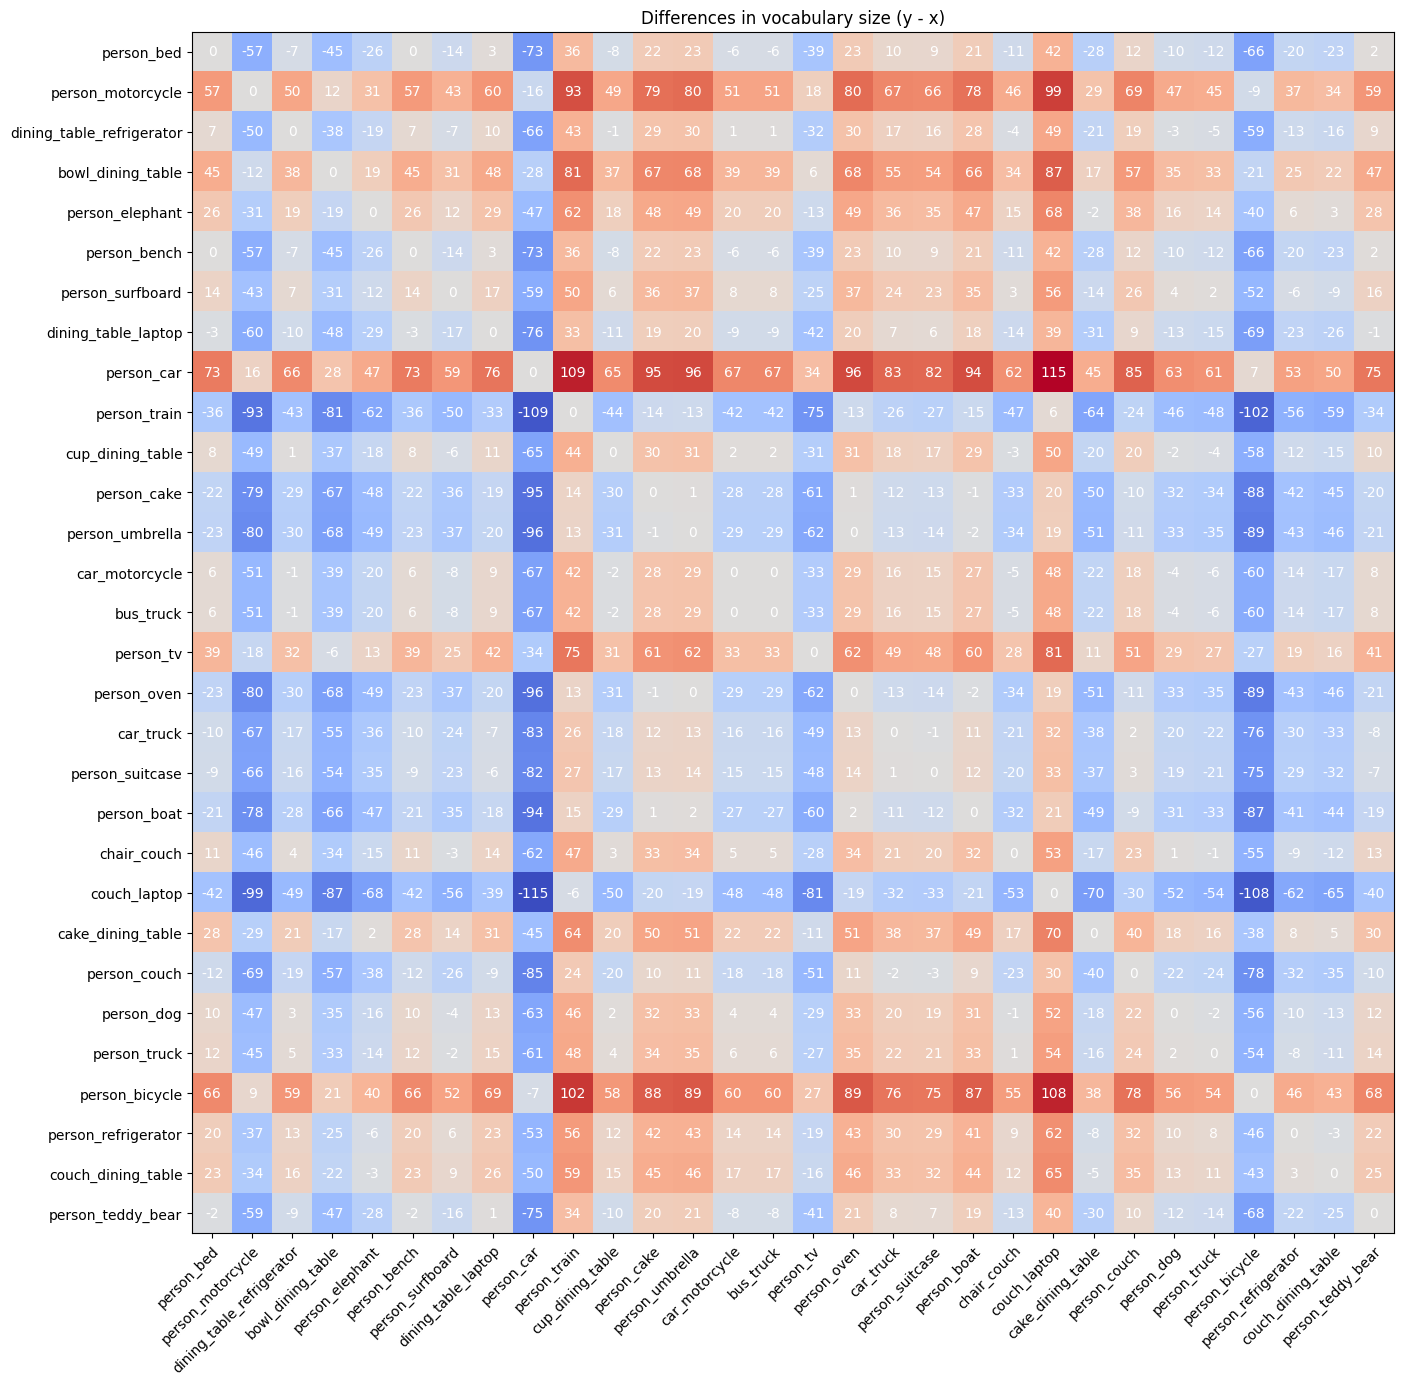

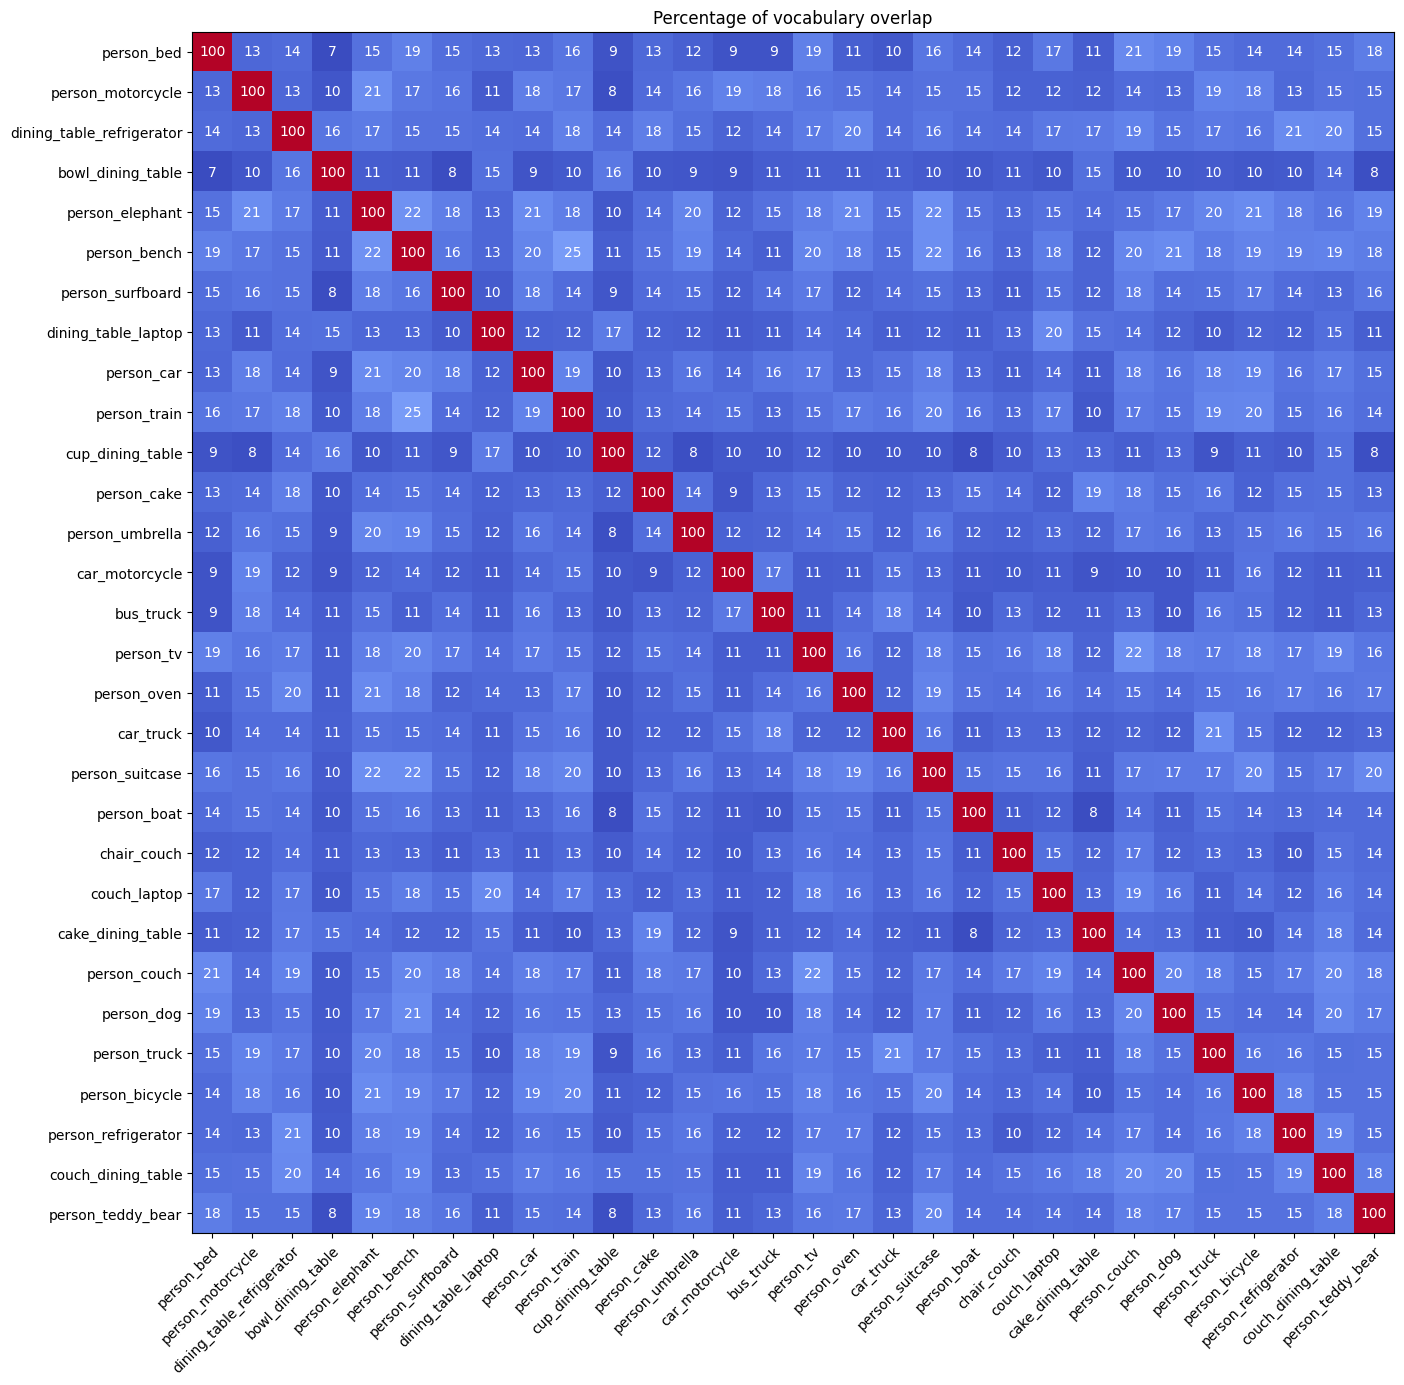

In [26]:
plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

#### Test

In [27]:
vocab_size_diffs = np.zeros((len(image_domains), len(image_domains)))
vocab_overlap = np.zeros((len(image_domains), len(image_domains)))

for i, d1 in enumerate(image_domains):
    vocab_set_d1 = set(test_vocabs_nostopwords[d1])
    
    for j, d2 in enumerate(image_domains):
        vocab_set_d2 = set(test_vocabs_nostopwords[d2])
        
        vocab_size_diffs[i, j] = len(vocab_set_d1) - len(vocab_set_d2)
        
        overlap = vocab_set_d1 & vocab_set_d2
        universe = vocab_set_d1 | vocab_set_d2
        
        vocab_overlap[i, j] = float(len(overlap)) / len(universe) * 100

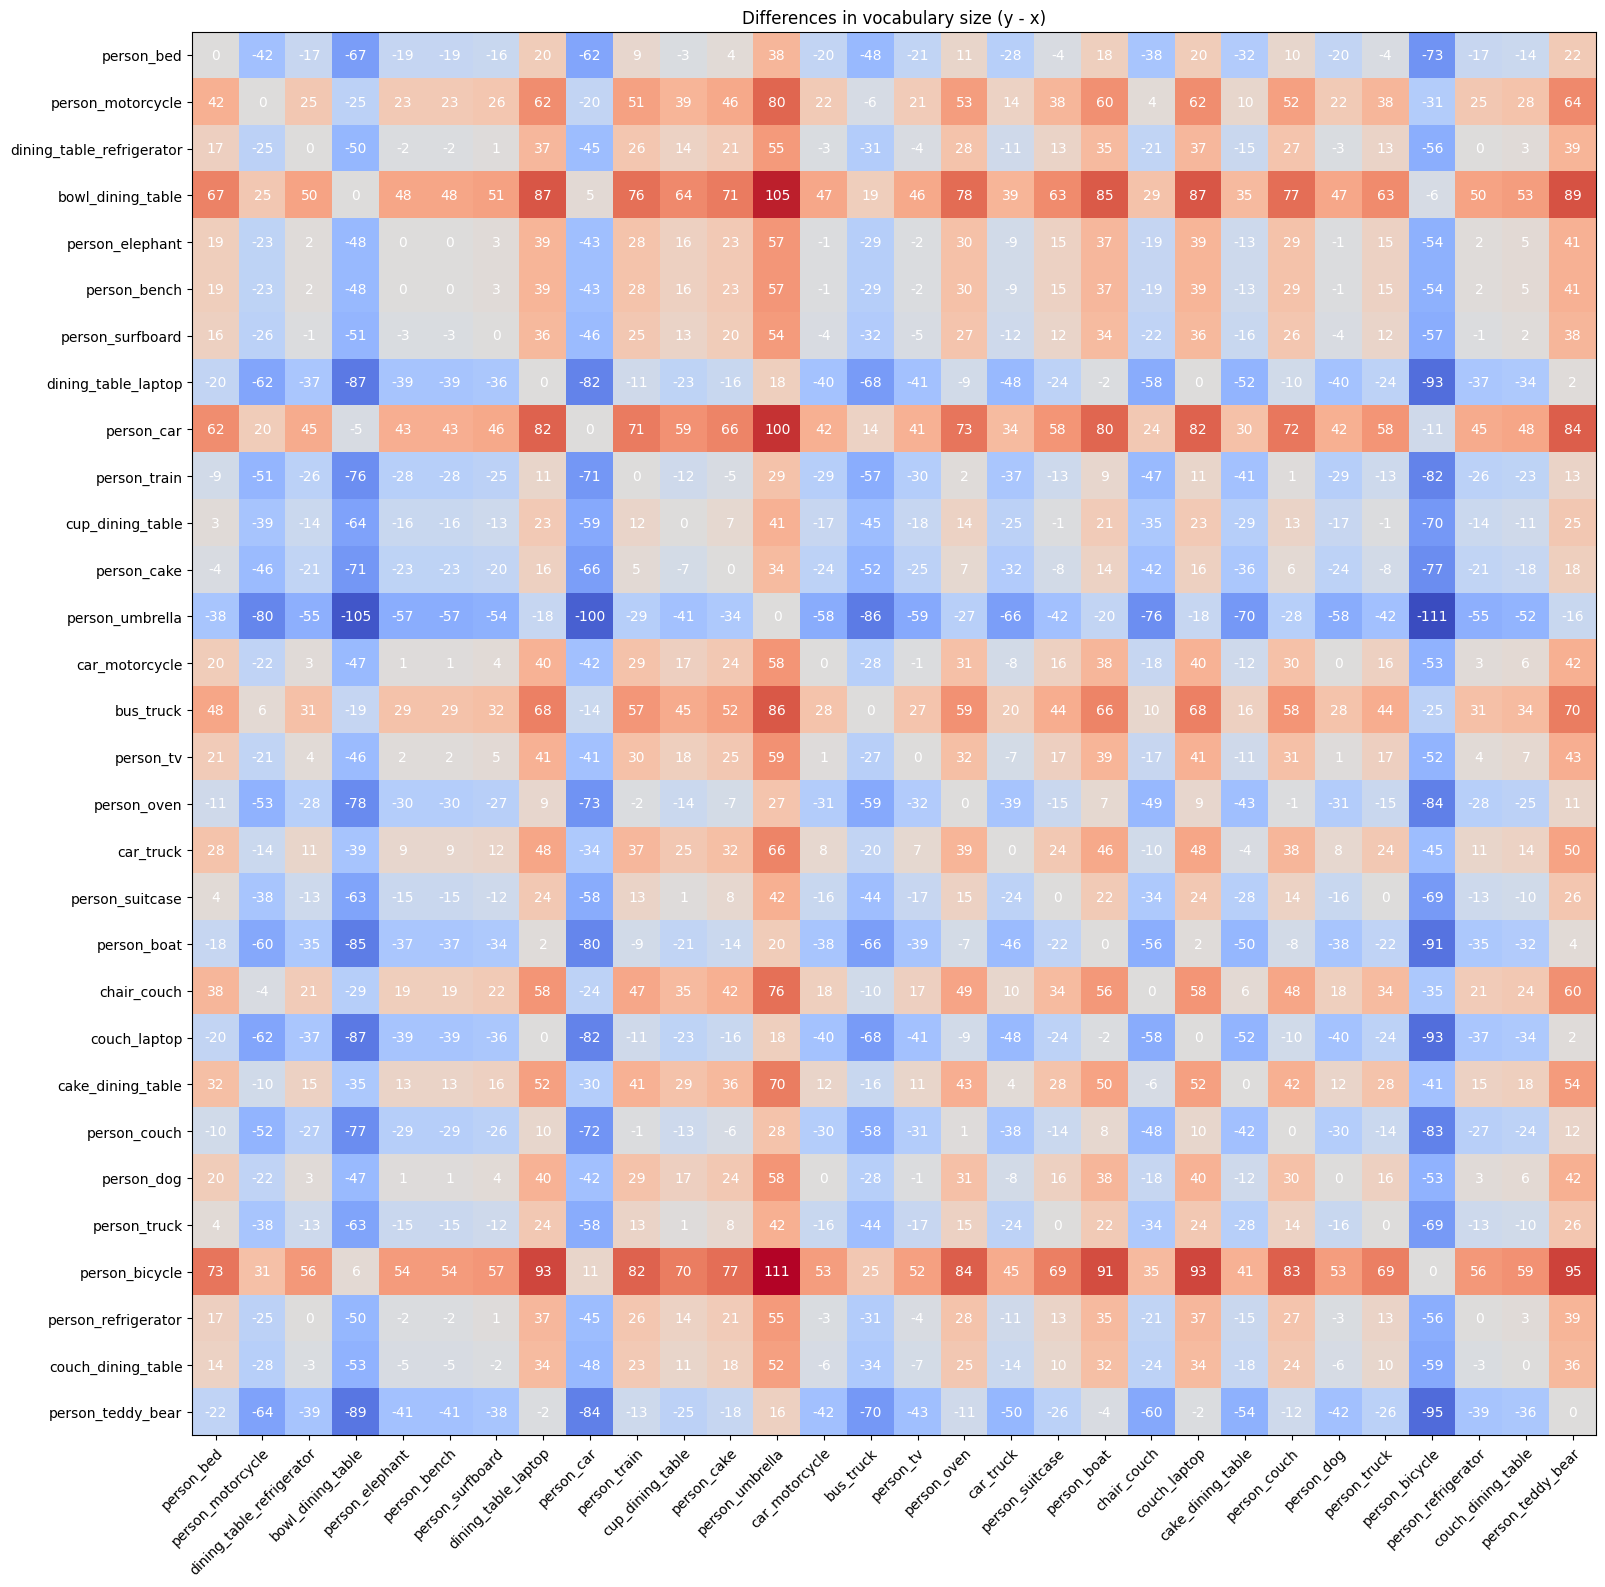

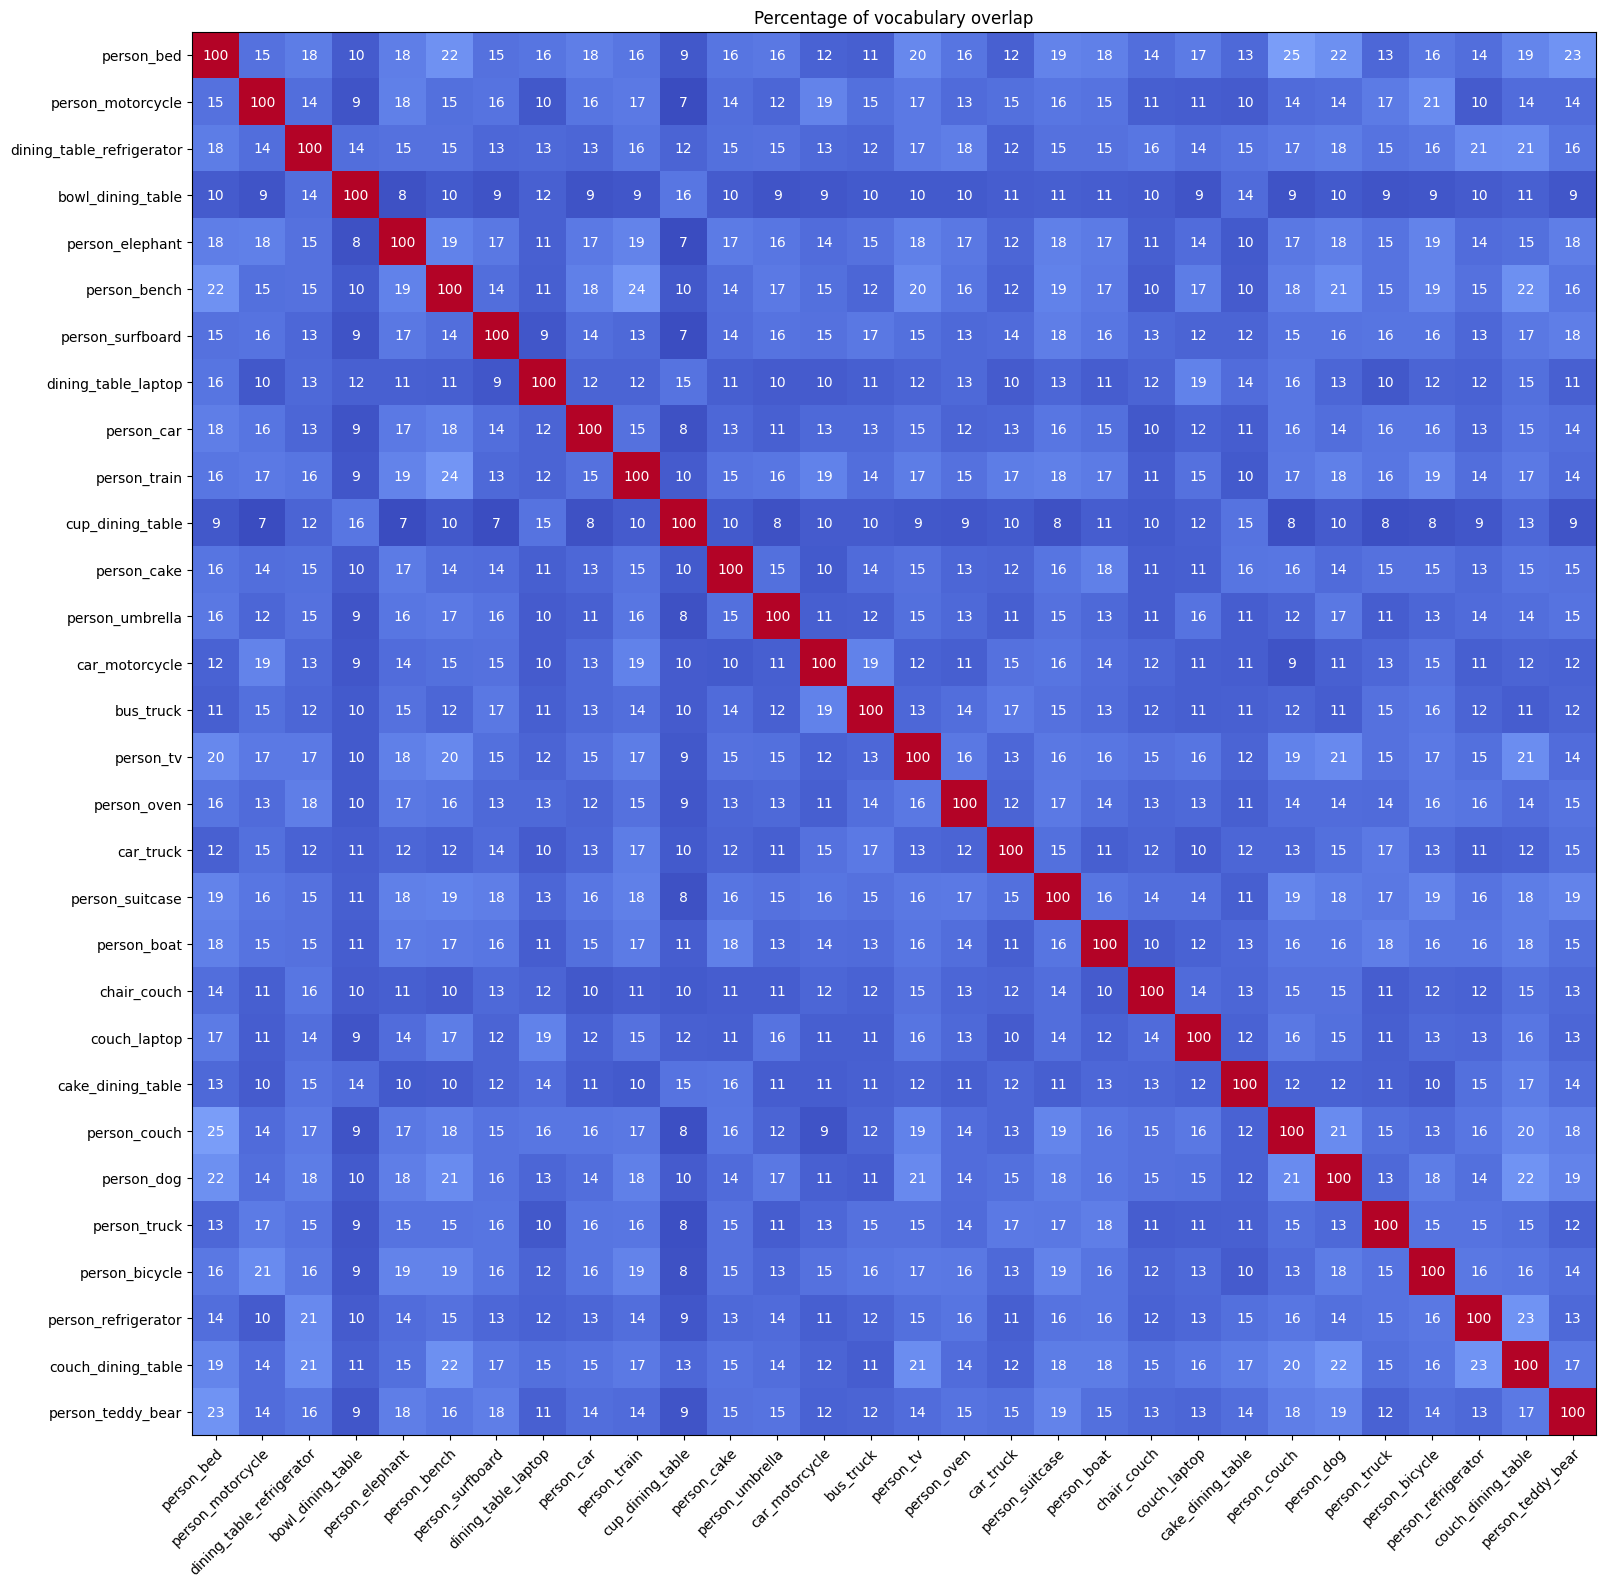

In [28]:
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
im = ax.imshow(vocab_size_diffs, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_size_diffs[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Differences in vocabulary size (y - x)")
fig.tight_layout()
plt.show()

# ============================================================

fig, ax = plt.subplots()
im = ax.imshow(vocab_overlap, cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(image_domains)))
ax.set_yticks(np.arange(len(image_domains)))
# ... and label them with the respective list entries
ax.set_xticklabels(image_domains)
ax.set_yticklabels(image_domains)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(image_domains)):
    for j in range(len(image_domains)):
        text = ax.text(j, i, int(vocab_overlap[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Percentage of vocabulary overlap")
fig.tight_layout()
plt.show()

---

In [29]:
printed = set()

for d1 in image_domains:
    vocab_set_d1 = set(train_vocabs_nostopwords[d1])
    
    for d2 in image_domains:
        
        if d1 == d2:
            continue 
        if (d1, d2) in printed or (d2, d1) in printed:
            continue
        
        vocab_set_d2 = set(train_vocabs_nostopwords[d2])
        
        overlap = vocab_set_d1 & vocab_set_d2
        
        print(d1, d2)
        print(overlap)
        print()
        
        printed.add((d1, d2))

person_bed person_motorcycle
{'woman', 'old', 'looks', 'boy', 'blond', 'u', 'picture', 'brown', 'head', 'kid', 'hair', 'okay', ':', 'hey', 'taking', 'khaki', 'piece', 'grey', 'think', 'm', 'lady', 'sorry', 's', 'image', 'large', ' ', 'face', 'tan', 'shot', 'gray', 'men', 'mirror', 'dirt', 'white', 'long', 'facing', 'k', 'wheel', 'orange', 'blonde', 'time', 'female', 'girl', 'girls', 'away', 'pic', 'hello', 'view', 'young', 'people', 'got', 'jeans', 'big', 'couple', 'blue', '/', 'man', 'mirrow', 'th', 'like', 'body', 'glasses', 'bottle', 'clothes', 'camera', ';', 'looking', '-', 'guy', 'finally', 'good', 'brunette', 'yellow', 'left', 'standing', 'red', 'bag', 'strips', 'holding', 'shorts', '"', 'dude', 'middle', 'near', '&', 'background', 'reflection', 'bunch', 'green', 'photo', 'right', 'light', 'small', 'ones', 'lot', 'asian', 'tshirt', 'stretched', 'lots', 'sitting', 'black', 'person', 'shirt', 'women', 'elderly', '+', 'hi', 'little', 'wearing', 'short', 't', 'leaning', 'half', 'high

Check for domain-specific vocabularies

In [ ]:
Filter by min freq of 2

In [35]:
domain_specific_vocabs = {}
for d1 in image_domains:
    vocab_set_d1 = set(train_vocabs_nostopwords[d1])
    
    for d2 in image_domains:
        
        if d1 == d2:
            continue
        
        vocab_set_d2 = set(train_vocabs_nostopwords[d2])

        vocab_set_d1 = vocab_set_d1 - vocab_set_d2
       
    domain_specific_vocabs[d1] = vocab_set_d1
    print(d1, len(vocab_set_d1))
    print(vocab_set_d1)
    print()

person_bed 66
{'jumpsuit', 'owmen', 'pigtails', 'reflecting', 'tddy', 'closet', 'oy', 'mattress', 'shoqing', 'foldout', 'winnie', 'pnly', 'laid', 'kicked', 'alseep', 'lyying', 'winni', 'ltop', 'ggame', 'pigtailed', 'retrievers', 'receiver', 'twilight', 'matress', 'forget', 'gtail', 'matreess', 'pullout', 'pj', 'game(wii', 'twighlight', 'whew', 'telephone', 'wavy', 'shorter', 'ay', 'poohs', 'booties', 'noses', 'gir', 'piglet', 'dungerees', 'halfway', 'haircut', 'pig', 'send', 'dolls', 'icture', 'stuffie', 'sippy', 'dungarees', 'po', 'grown', 'overed', 'ups', 'picktails', 'knees', 'stuffend', 'animls', 'gild', 'womanw', 'controls', 'overalls', 'wearig', 'doggies', 'aove'}

person_motorcycle 108
{'fatty', 'skull', 'kahaki', 'kicking', 'glitched', 'alike', 'version', 'cutoff', 'motocyle', 'dirtbike', 'biege', 'cleavage', 'fellas', 'motorcyclr', 'greenbike', '.black', 'smock', 'bklack', 'cuy', 'dreadlocks', 'constume', 'skullcap', 'lineup', 'photographed', 'motorcross', 'roasted', 'motocros

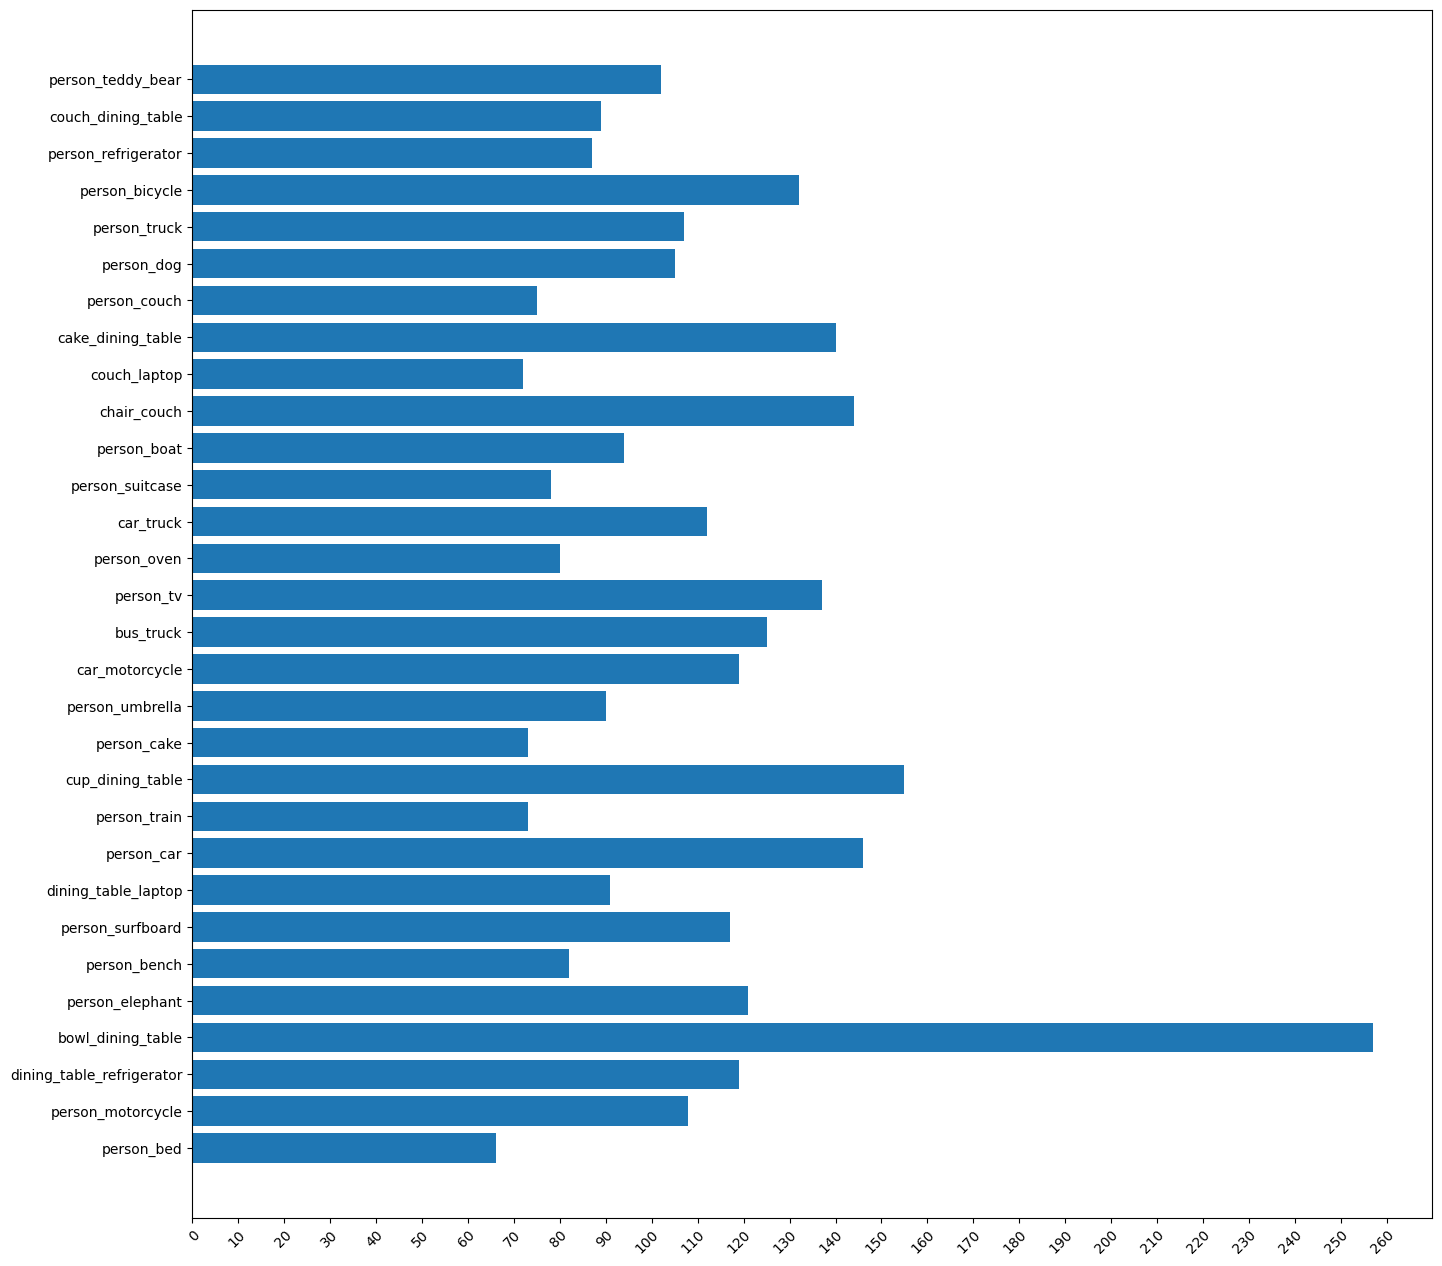

In [42]:
specific_vocab_lens = [len(domain_specific_vocabs[d]) for d in image_domains]

fig, ax = plt.subplots()
im = ax.barh(image_domains, specific_vocab_lens)

ax.set_xticks(np.arange(0, max(specific_vocab_lens)+10, 10))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()